In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 250)
pd.set_option('display.max_rows', 500)
df = pd.read_csv('/kaggle/input/engage-2-value-from-clicks-to-conversions/train_data.csv')
df.shape

(116023, 52)

In [2]:
import warnings

warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)  # If you also want to ignore RuntimeWarnings


In [3]:
cdf = df.copy()
cdf

trafficSource.isTrueDirect  purchaseValue            browser  \
0                             NaN            0.0               Edge   
1                            True            0.0             Chrome   
2                            True            0.0             Chrome   
3                             NaN            0.0  Internet Explorer   
4                            True     88950000.0             Chrome   
...                           ...            ...                ...   
116018                        NaN     35180000.0             Chrome   
116019                       True            0.0             Chrome   
116020                       True            0.0             Chrome   
116021                        NaN            0.0             Chrome   
116022                       True     81470000.0             Chrome   

              device.screenResolution trafficSource.adContent  \
0       not available in demo dataset                     NaN   
1       not available in demo dataset                     NaN   
2       not available in demo dataset                     NaN   
3       not available in demo dataset                     NaN   
4       not available in demo dataset                     NaN   
...                               ...                     ...   
116018  not available in demo dataset                     NaN   
116019  not available in demo dataset                     NaN   
116020  not available in demo dataset                     NaN   
116021  not available in demo dataset                     NaN   
116022  not available in demo dataset                     NaN   

       trafficSource.keyword screenSize geoCluster  \
0                        NaN     medium   Region_2   
1                        NaN     medium   Region_3   
2             (not provided)     medium   Region_2   
3                        NaN     medium   Region_4   
4                        NaN     medium   Region_3   
...                      ...        ...        ...   
116018                   NaN     medium   Region_3   
116019                   NaN     medium   Region_5   
116020                   NaN     medium   Region_1   
116021        (not provided)     medium   Region_5   
116022        (not provided)     medium   Region_5   

       trafficSource.adwordsClickInfo.slot    device.mobileDeviceBranding  \
0                                      NaN  not available in demo dataset   
1                                      NaN  not available in demo dataset   
2                                      NaN  not available in demo dataset   
3                                      NaN  not available in demo dataset   
4                                      NaN  not available in demo dataset   
...                                    ...                            ...   
116018                                 NaN  not available in demo dataset   
116019                                 NaN  not available in demo dataset   
116020                                 NaN  not available in demo dataset   
116021                                 NaN  not available in demo dataset   
116022                                 NaN  not available in demo dataset   

           device.mobileInputSelector  userId trafficSource.campaign  \
0       not available in demo dataset   61421              (not set)   
1       not available in demo dataset   72287              (not set)   
2       not available in demo dataset   25180              (not set)   
3       not available in demo dataset   41295              (not set)   
4       not available in demo dataset  113697              (not set)   
...                               ...     ...                    ...   
116018  not available in demo dataset  109014              (not set)   
116019  not available in demo dataset   66111              (not set)   
116020  not available in demo dataset   97614              (not set)   
116021  not available in demo dataset   71050              (not set)   
116022 

In [4]:
cdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116023 entries, 0 to 116022
Data columns (total 52 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   trafficSource.isTrueDirect                    42890 non-null   object 
 1   purchaseValue                                 116023 non-null  float64
 2   browser                                       116023 non-null  object 
 3   device.screenResolution                       116023 non-null  object 
 4   trafficSource.adContent                       2963 non-null    object 
 5   trafficSource.keyword                         44162 non-null   object 
 6   screenSize                                    116023 non-null  object 
 7   geoCluster                                    116023 non-null  object 
 8   trafficSource.adwordsClickInfo.slot           4281 non-null    object 
 9   device.mobileDeviceBranding                   11

In [5]:
cdf.describe()

purchaseValue         userId   gclIdPresent  sessionNumber  \
count   1.160230e+05  116023.000000  116023.000000  116023.000000   
mean    2.656393e+07   61094.356231       0.037019       2.691311   
std     2.051825e+08   35240.756859       0.188808      10.451613   
min     0.000000e+00       0.000000       0.000000       1.000000   
25%     0.000000e+00   30603.500000       0.000000       1.000000   
50%     0.000000e+00   61014.000000       0.000000       1.000000   
75%     0.000000e+00   91616.500000       0.000000       2.000000   
max     2.312950e+10  122276.000000       1.000000     447.000000   

       totals.visits     sessionId  trafficSource.adwordsClickInfo.page  \
count       116023.0  1.160230e+05                          4281.000000   
mean             1.0  1.493429e+09                             1.019622   
std              0.0  1.528798e+07                             0.174517   
min              1.0  1.470035e+09                             1.000000   
25%              1.0  1.480066e+09                             1.000000   
50%              1.0  1.491646e+09                             1.000000   
75%              1.0  1.505079e+09                             1.000000   
max              1.0  1.525157e+09                             5.000000   

           pageViews  locationZone  totals.bounces          date  \
count  116015.000000      116023.0         47148.0  1.160230e+05   
mean        8.412352           8.0             1.0  2.016860e+07   
std        14.344937           0.0             0.0  6.182322e+03   
min         1.000000           8.0             1.0  2.016080e+07   
25%         1.000000           8.0             1.0  2.016112e+07   
50%         2.000000           8.0             1.0  2.017041e+07   
75%        10.000000           8.0             1.0  2.017091e+07   
max       469.000000           8.0             1.0  2.018043e+07   

           totalHits  sessionStart  new_visits  
count  116023.000000  1.160230e+05     80518.0  
mean       10.607371  1.493429e+09         1.0  
std        19.629576  1.528798e+07         0.0  
min         1.000000  1.470035e+09         1.0  
25%         1.000000  1.480066e+09         1.0  
50%         2.000000  1.491646e+09         1.0  
75%        12.000000  1.505079e+09         1.0  
max       500.000000  1.525157e+09         1.0

In [6]:
cdf.isnull().sum()

trafficSource.isTrueDirect                       73133
purchaseValue                                        0
browser                                              0
device.screenResolution                              0
trafficSource.adContent                         113060
trafficSource.keyword                            71861
screenSize                                           0
geoCluster                                           0
trafficSource.adwordsClickInfo.slot             111742
device.mobileDeviceBranding                          0
device.mobileInputSelector                           0
userId                                               0
trafficSource.campaign                               0
device.mobileDeviceMarketingName                     0
geoNetwork.networkDomain                             0
gclIdPresent                                         0
device.operatingSystemVersion                        0
sessionNumber                                        0
device.fla

In [7]:
cdf.isnull().sum().sum()

882719

In [8]:
#Total number of categorical variables
categorical_features = cdf.select_dtypes(include=['object']).columns
print(categorical_features)
print(len(categorical_features))

Index(['trafficSource.isTrueDirect', 'browser', 'device.screenResolution',
       'trafficSource.adContent', 'trafficSource.keyword', 'screenSize',
       'geoCluster', 'trafficSource.adwordsClickInfo.slot',
       'device.mobileDeviceBranding', 'device.mobileInputSelector',
       'trafficSource.campaign', 'device.mobileDeviceMarketingName',
       'geoNetwork.networkDomain', 'device.operatingSystemVersion',
       'device.flashVersion', 'geoNetwork.region', 'trafficSource',
       'geoNetwork.networkLocation', 'os', 'geoNetwork.subContinent',
       'trafficSource.medium', 'trafficSource.adwordsClickInfo.isVideoAd',
       'browserMajor', 'locationCountry', 'device.browserSize',
       'trafficSource.adwordsClickInfo.adNetworkType', 'socialEngagementType',
       'geoNetwork.city', 'geoNetwork.metro', 'device.mobileDeviceModel',
       'trafficSource.referralPath', 'device.language', 'deviceType',
       'userChannel', 'device.browserVersion', 'device.screenColors',
       'geoNetwor

In [9]:
#Total number of nummerical columns
numerical_features = cdf.select_dtypes(include=['int64', 'float64']).columns
print(numerical_features)
print(len(numerical_features))

Index(['purchaseValue', 'userId', 'gclIdPresent', 'sessionNumber',
       'totals.visits', 'sessionId', 'trafficSource.adwordsClickInfo.page',
       'pageViews', 'locationZone', 'totals.bounces', 'date', 'totalHits',
       'sessionStart', 'new_visits'],
      dtype='object')
14


In [10]:
#Total number of binary columns
binary_columns = cdf.select_dtypes(include=['bool']).columns
print(binary_columns)
print(len(binary_columns))

Index(['device.isMobile'], dtype='object')
1


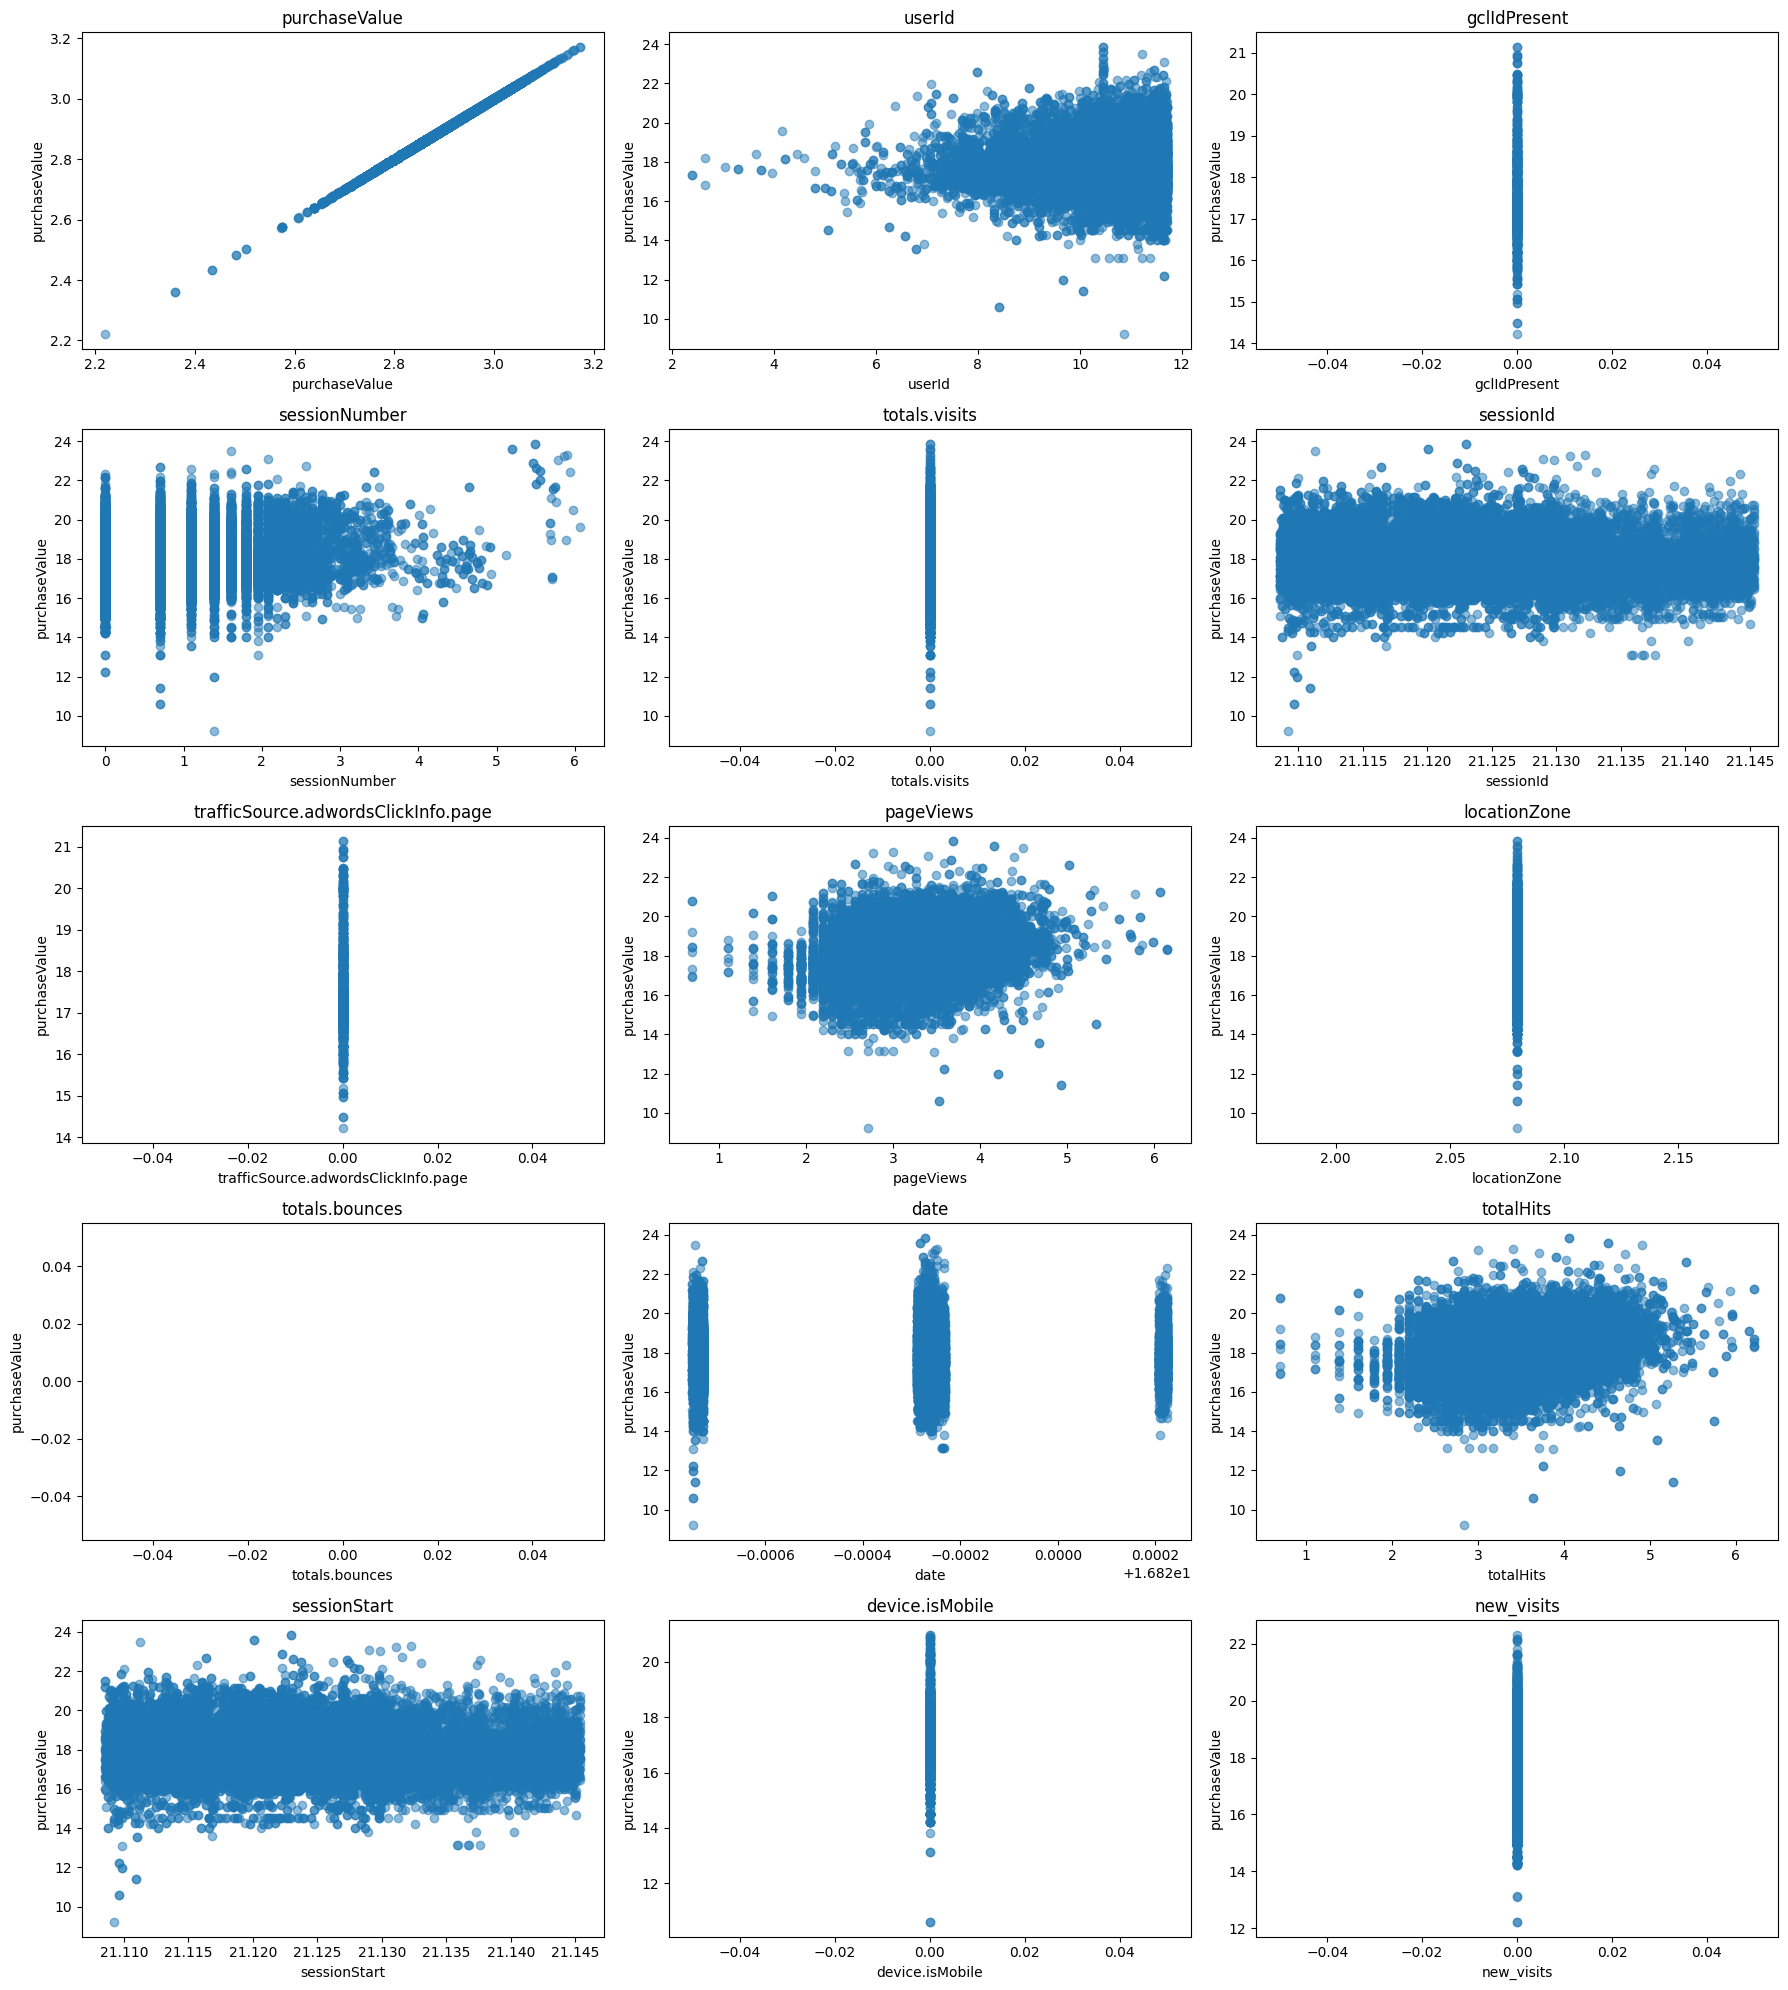

In [11]:
import matplotlib.pyplot as plt
import numpy as np

numerical_features = cdf.select_dtypes(include=['int64', 'float64', 'bool']).columns

# Define grid size
n_features = len(numerical_features)
n_cols = 3  # Number of columns in the grid
n_rows = (n_features + n_cols - 1) // n_cols  # Ceiling division for rows

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 6, n_rows * 4))
axes = axes.flatten()  # Flatten to 1D for easy indexing

# Plot each scatter plot
for idx, feature in enumerate(numerical_features):
    data = cdf.copy()
    # Avoid log(0) and log of negative numbers
    data = data[(data[feature] > 0) & (data['purchaseValue'] > 0)]
    data[feature] = np.log(data[feature])
    data['purchaseValue'] = np.log(data['purchaseValue'])

    axes[idx].scatter(data[feature], data['purchaseValue'], alpha=0.5)
    axes[idx].set_xlabel(feature)
    axes[idx].set_ylabel('purchaseValue')
    axes[idx].set_title(feature)

# Turn off any unused subplots
for j in range(idx + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


In [12]:
cdf[numerical_features].nunique()

purchaseValue                            6766
userId                                 100499
gclIdPresent                                2
sessionNumber                             230
totals.visits                               1
sessionId                              107379
trafficSource.adwordsClickInfo.page         5
pageViews                                 175
locationZone                                1
totals.bounces                              1
date                                      638
totalHits                                 225
sessionStart                           107388
device.isMobile                             2
new_visits                                  1
dtype: int64

In [13]:
cdf[categorical_features].nunique()

trafficSource.isTrueDirect                        1
browser                                          34
device.screenResolution                           1
trafficSource.adContent                          53
trafficSource.keyword                           566
screenSize                                        1
geoCluster                                        5
trafficSource.adwordsClickInfo.slot               3
device.mobileDeviceBranding                       1
device.mobileInputSelector                        1
trafficSource.campaign                           28
device.mobileDeviceMarketingName                  1
geoNetwork.networkDomain                          3
device.operatingSystemVersion                     1
device.flashVersion                               1
geoNetwork.region                               388
trafficSource                                   161
geoNetwork.networkLocation                        1
os                                               18
geoNetwork.s

### Analysis of Missing Values on Target Variable!

In [14]:
cdf[numerical_features].isnull().sum()

purchaseValue                               0
userId                                      0
gclIdPresent                                0
sessionNumber                               0
totals.visits                               0
sessionId                                   0
trafficSource.adwordsClickInfo.page    111742
pageViews                                   8
locationZone                                0
totals.bounces                          68875
date                                        0
totalHits                                   0
sessionStart                                0
device.isMobile                             0
new_visits                              35505
dtype: int64

In [15]:
cdf['trafficSource.adwordsClickInfo.page'].value_counts(dropna=False)

trafficSource.adwordsClickInfo.page
NaN    111742
1.0      4216
2.0        50
3.0        12
4.0         2
5.0         1
Name: count, dtype: int64

In [16]:
# import matplotlib.pyplot as plt

# # Feature to analyze
# feature = 'trafficSource.adwordsClickInfo.page'

# # Group by missingness without creating a new column
# grouped = cdf.groupby(cdf[feature].isnull())['purchaseValue']

# # Compute mean purchase value for missing and non-missing groups
# mean_purchase = grouped.mean()

# # Count of missing and non-missing values
# count = grouped.count()

# # Plotting
# plt.figure(figsize=(6, 4))
# bars = mean_purchase.plot(kind='bar', color=['green', 'red'])

# # Label x-axis
# plt.xticks(ticks=[0, 1], labels=['Not Missing (False)', 'Missing (True)'], rotation=0)
# plt.ylabel('Average Purchase Value')
# plt.title(f"Effect of Missingness in '{feature}' on Purchase Value")
# plt.grid(axis='y', linestyle='--', alpha=0.7)

# # Annotate bar values with avg purchase and count
# for i, value in enumerate(mean_purchase):
#     bar_label = f'{value:.2f}\n(n={count.iloc[i]})'
#     plt.text(i, value + 0.02, bar_label, ha='center')

# plt.tight_layout()
# plt.show()


In [17]:
cdf

trafficSource.isTrueDirect  purchaseValue            browser  \
0                             NaN            0.0               Edge   
1                            True            0.0             Chrome   
2                            True            0.0             Chrome   
3                             NaN            0.0  Internet Explorer   
4                            True     88950000.0             Chrome   
...                           ...            ...                ...   
116018                        NaN     35180000.0             Chrome   
116019                       True            0.0             Chrome   
116020                       True            0.0             Chrome   
116021                        NaN            0.0             Chrome   
116022                       True     81470000.0             Chrome   

              device.screenResolution trafficSource.adContent  \
0       not available in demo dataset                     NaN   
1       not available in demo dataset                     NaN   
2       not available in demo dataset                     NaN   
3       not available in demo dataset                     NaN   
4       not available in demo dataset                     NaN   
...                               ...                     ...   
116018  not available in demo dataset                     NaN   
116019  not available in demo dataset                     NaN   
116020  not available in demo dataset                     NaN   
116021  not available in demo dataset                     NaN   
116022  not available in demo dataset                     NaN   

       trafficSource.keyword screenSize geoCluster  \
0                        NaN     medium   Region_2   
1                        NaN     medium   Region_3   
2             (not provided)     medium   Region_2   
3                        NaN     medium   Region_4   
4                        NaN     medium   Region_3   
...                      ...        ...        ...   
116018                   NaN     medium   Region_3   
116019                   NaN     medium   Region_5   
116020                   NaN     medium   Region_1   
116021        (not provided)     medium   Region_5   
116022        (not provided)     medium   Region_5   

       trafficSource.adwordsClickInfo.slot    device.mobileDeviceBranding  \
0                                      NaN  not available in demo dataset   
1                                      NaN  not available in demo dataset   
2                                      NaN  not available in demo dataset   
3                                      NaN  not available in demo dataset   
4                                      NaN  not available in demo dataset   
...                                    ...                            ...   
116018                                 NaN  not available in demo dataset   
116019                                 NaN  not available in demo dataset   
116020                                 NaN  not available in demo dataset   
116021                                 NaN  not available in demo dataset   
116022                                 NaN  not available in demo dataset   

           device.mobileInputSelector  userId trafficSource.campaign  \
0       not available in demo dataset   61421              (not set)   
1       not available in demo dataset   72287              (not set)   
2       not available in demo dataset   25180              (not set)   
3       not available in demo dataset   41295              (not set)   
4       not available in demo dataset  113697              (not set)   
...                               ...     ...                    ...   
116018  not available in demo dataset  109014              (not set)   
116019  not available in demo dataset   66111              (not set)   
116020  not available in demo dataset   97614              (not set)   
116021  not available in demo dataset   71050              (not set)   
116022 

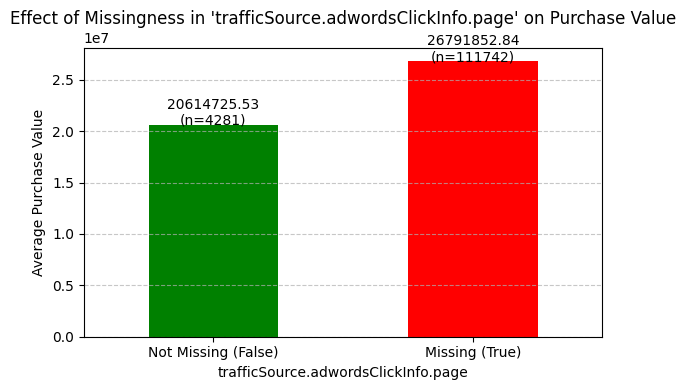

In [18]:
import matplotlib.pyplot as plt

# Feature to analyze
feature = 'trafficSource.adwordsClickInfo.page'

# Group by missingness without creating a new column
grouped = cdf.groupby(cdf[feature].isnull())['purchaseValue']

# Compute mean purchase value for missing and non-missing groups
mean_purchase = grouped.mean()

# Count of missing and non-missing values
count = grouped.count()

# Plotting
plt.figure(figsize=(6, 4))
bars = mean_purchase.plot(kind='bar', color=['green', 'red'])

# Label x-axis
plt.xticks(ticks=[0, 1], labels=['Not Missing (False)', 'Missing (True)'], rotation=0)
plt.ylabel('Average Purchase Value')
plt.title(f"Effect of Missingness in '{feature}' on Purchase Value")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate bar values with avg purchase and count
for i, value in enumerate(mean_purchase):
    bar_label = f'{value:.2f}\n(n={count.iloc[i]})'
    plt.text(i, value + 0.02, bar_label, ha='center')

plt.tight_layout()
plt.show()


In [19]:
cdf

trafficSource.isTrueDirect  purchaseValue            browser  \
0                             NaN            0.0               Edge   
1                            True            0.0             Chrome   
2                            True            0.0             Chrome   
3                             NaN            0.0  Internet Explorer   
4                            True     88950000.0             Chrome   
...                           ...            ...                ...   
116018                        NaN     35180000.0             Chrome   
116019                       True            0.0             Chrome   
116020                       True            0.0             Chrome   
116021                        NaN            0.0             Chrome   
116022                       True     81470000.0             Chrome   

              device.screenResolution trafficSource.adContent  \
0       not available in demo dataset                     NaN   
1       not available in demo dataset                     NaN   
2       not available in demo dataset                     NaN   
3       not available in demo dataset                     NaN   
4       not available in demo dataset                     NaN   
...                               ...                     ...   
116018  not available in demo dataset                     NaN   
116019  not available in demo dataset                     NaN   
116020  not available in demo dataset                     NaN   
116021  not available in demo dataset                     NaN   
116022  not available in demo dataset                     NaN   

       trafficSource.keyword screenSize geoCluster  \
0                        NaN     medium   Region_2   
1                        NaN     medium   Region_3   
2             (not provided)     medium   Region_2   
3                        NaN     medium   Region_4   
4                        NaN     medium   Region_3   
...                      ...        ...        ...   
116018                   NaN     medium   Region_3   
116019                   NaN     medium   Region_5   
116020                   NaN     medium   Region_1   
116021        (not provided)     medium   Region_5   
116022        (not provided)     medium   Region_5   

       trafficSource.adwordsClickInfo.slot    device.mobileDeviceBranding  \
0                                      NaN  not available in demo dataset   
1                                      NaN  not available in demo dataset   
2                                      NaN  not available in demo dataset   
3                                      NaN  not available in demo dataset   
4                                      NaN  not available in demo dataset   
...                                    ...                            ...   
116018                                 NaN  not available in demo dataset   
116019                                 NaN  not available in demo dataset   
116020                                 NaN  not available in demo dataset   
116021                                 NaN  not available in demo dataset   
116022                                 NaN  not available in demo dataset   

           device.mobileInputSelector  userId trafficSource.campaign  \
0       not available in demo dataset   61421              (not set)   
1       not available in demo dataset   72287              (not set)   
2       not available in demo dataset   25180              (not set)   
3       not available in demo dataset   41295              (not set)   
4       not available in demo dataset  113697              (not set)   
...                               ...     ...                    ...   
116018  not available in demo dataset  109014              (not set)   
116019  not available in demo dataset   66111              (not set)   
116020  not available in demo dataset   97614              (not set)   
116021  not available in demo dataset   71050              (not set)   
116022 

In [20]:
cdf['totals.bounces'].value_counts(dropna=False)

totals.bounces
NaN    68875
1.0    47148
Name: count, dtype: int64

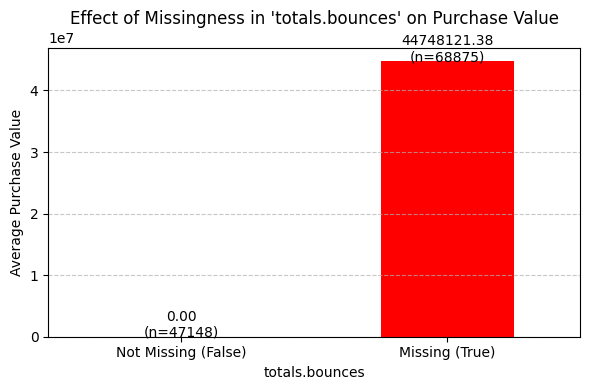

In [21]:
import matplotlib.pyplot as plt

# Feature to analyze
feature = 'totals.bounces'

# Group by missingness directly, without creating a new column
grouped = cdf.groupby(cdf[feature].isnull())['purchaseValue']

# Compute mean purchase value for missing and non-missing groups
mean_purchase = grouped.mean()

# Count of missing and non-missing values
count = grouped.count()

# Plotting
plt.figure(figsize=(6, 4))
bars = mean_purchase.plot(kind='bar', color=['green', 'red'])

# Label x-axis
plt.xticks(ticks=[0, 1], labels=['Not Missing (False)', 'Missing (True)'], rotation=0)
plt.ylabel('Average Purchase Value')
plt.title(f"Effect of Missingness in '{feature}' on Purchase Value")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate bar values with avg purchase and count
for i, value in enumerate(mean_purchase):
    bar_label = f'{value:.2f}\n(n={count.iloc[i]})'
    plt.text(i, value + 0.02, bar_label, ha='center')

plt.tight_layout()
plt.show()


In [22]:
cdf['new_visits'].value_counts(dropna=False)

new_visits
1.0    80518
NaN    35505
Name: count, dtype: int64

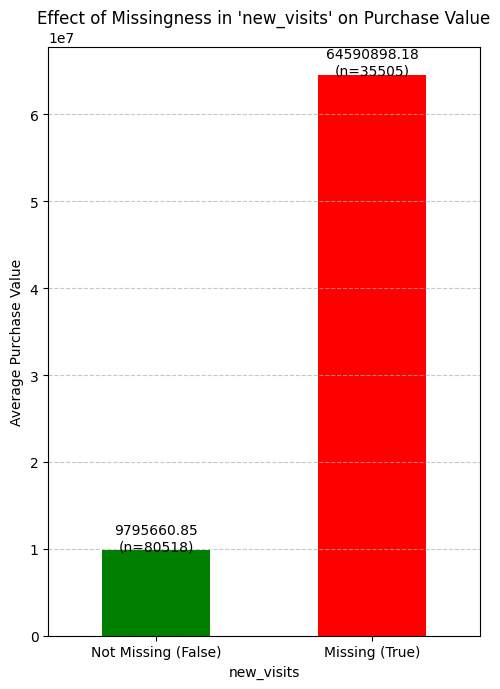

In [23]:
import matplotlib.pyplot as plt

# Feature to analyze
feature = 'new_visits'

# Group by missingness directly, without creating a new column
grouped = cdf.groupby(cdf[feature].isnull())['purchaseValue']

# Compute mean purchase value for missing and non-missing groups
mean_purchase = grouped.mean()

# Count of missing and non-missing values
count = grouped.count()

# Plotting
plt.figure(figsize=(5, 7))
bars = mean_purchase.plot(kind='bar', color=['green', 'red'])

# Label x-axis
plt.xticks(ticks=[0, 1], labels=['Not Missing (False)', 'Missing (True)'], rotation=0)
plt.ylabel('Average Purchase Value')
plt.title(f"Effect of Missingness in '{feature}' on Purchase Value")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate bar values with avg purchase and count
for i, value in enumerate(mean_purchase):
    bar_label = f'{value:.2f}\n(n={count.iloc[i]})'
    plt.text(i, value + 0.01, bar_label, ha='center')

plt.tight_layout()
plt.show()


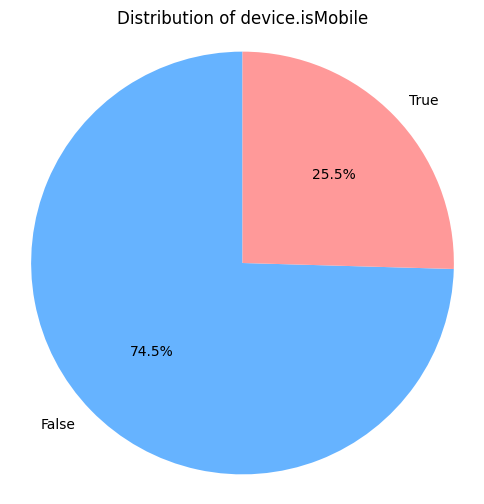

In [24]:
import matplotlib.pyplot as plt

# Example: binary column 'gclIdPresent'
binary_col = df['device.isMobile']

# Get value counts (including NaN if needed)
value_counts = binary_col.value_counts(dropna=False)

# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#ff9999'])
plt.title('Distribution of device.isMobile')
plt.axis('equal')  # Equal aspect ratio makes the pie a circle.
plt.show()


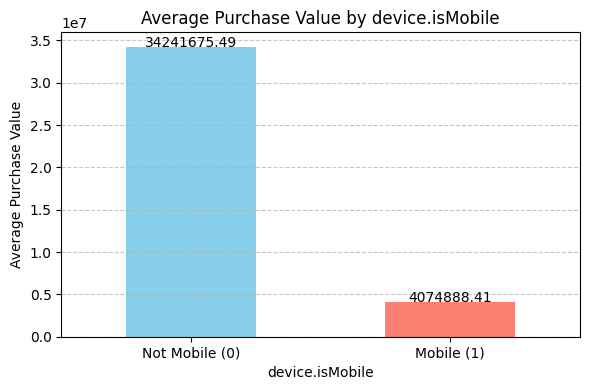

In [25]:
import matplotlib.pyplot as plt

# Binary column and target variable
binary_col = 'device.isMobile'
target_col = 'purchaseValue'

# Drop rows with missing values in either column
df_temp = df[[binary_col, target_col]].dropna()

# Group by binary column and compute average purchase value
mean_purchase = df_temp.groupby(binary_col)[target_col].mean()

# Plotting
plt.figure(figsize=(6, 4))
bars = mean_purchase.plot(kind='bar', color=['skyblue', 'salmon'])

plt.xticks(ticks=[0, 1], labels=['Not Mobile (0)', 'Mobile (1)'], rotation=0)
plt.ylabel('Average Purchase Value')
plt.title(f'Average Purchase Value by {binary_col}')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate bar values
for i, value in enumerate(mean_purchase):
    plt.text(i, value + 0.02, f'{value:.2f}', ha='center')

plt.tight_layout()
plt.show()


In [26]:
cdf[categorical_features].isnull().sum()

trafficSource.isTrueDirect                       73133
browser                                              0
device.screenResolution                              0
trafficSource.adContent                         113060
trafficSource.keyword                            71861
screenSize                                           0
geoCluster                                           0
trafficSource.adwordsClickInfo.slot             111742
device.mobileDeviceBranding                          0
device.mobileInputSelector                           0
trafficSource.campaign                               0
device.mobileDeviceMarketingName                     0
geoNetwork.networkDomain                             0
device.operatingSystemVersion                        0
device.flashVersion                                  0
geoNetwork.region                                    0
trafficSource                                        0
geoNetwork.networkLocation                           0
os        

In [27]:
cdf['trafficSource.isTrueDirect'].value_counts(dropna=False)

trafficSource.isTrueDirect
NaN     73133
True    42890
Name: count, dtype: int64

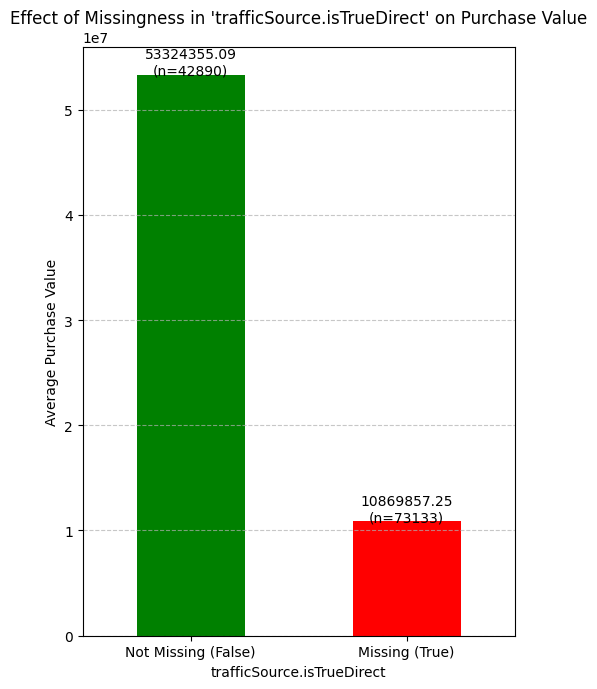

In [28]:
import matplotlib.pyplot as plt

# Feature to analyze
feature = 'trafficSource.isTrueDirect'

# Group by missingness directly, without creating a new column
grouped = cdf.groupby(cdf[feature].isnull())['purchaseValue']

# Compute mean purchase value for missing and non-missing groups
mean_purchase = grouped.mean()

# Count of missing and non-missing values
count = grouped.count()

# Plotting
plt.figure(figsize=(5, 7))
bars = mean_purchase.plot(kind='bar', color=['green', 'red'])

# Label x-axis
plt.xticks(ticks=[0, 1], labels=['Not Missing (False)', 'Missing (True)'], rotation=0)
plt.ylabel('Average Purchase Value')
plt.title(f"Effect of Missingness in '{feature}' on Purchase Value")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate bar values with avg purchase and count
for i, value in enumerate(mean_purchase):
    bar_label = f'{value:.2f}\n(n={count.iloc[i]})'
    plt.text(i, value + 0.01, bar_label, ha='center')

plt.tight_layout()
plt.show()


In [29]:
cdf['trafficSource.adContent'].value_counts(dropna=False)

trafficSource.adContent
NaN                                   113060
Google Merchandise Store                1410
Google Merchandise Collection            651
Display Ad created 3/11/14               135
Placement Accessores 300 x 250           114
Google Online Store                      104
Smart display ad - 8/17/2017              87
Full auto ad IMAGE ONLY                   61
Ad from 12/13/16                          50
Official Google Merchandise               46
Ad from 11/3/16                           39
Ad from 12/15/17                          34
{KeyWord:Google Brand Items}              26
Display Ad created 3/11/15                25
{KeyWord:Google Merchandise}              17
Swag with Google Logos                    16
Placement Drinkware 300x250               13
{KeyWord:Google Branded Gear}             12
BQ                                        11
Placement Accessories 160 x 600           10
Placement Elecronics 300 x 250             9
20% discount                   

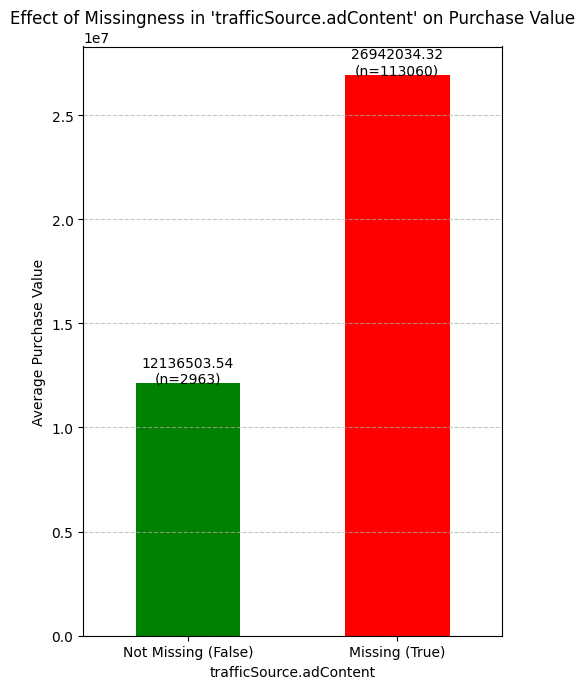

In [30]:
import matplotlib.pyplot as plt

# Feature to analyze
feature = 'trafficSource.adContent'

# Group by missingness directly, without creating or dropping any column
grouped = cdf.groupby(cdf[feature].isnull())['purchaseValue']

# Compute mean purchase value for missing and non-missing groups
mean_purchase = grouped.mean()

# Count of missing and non-missing values
count = grouped.count()

# Plotting
plt.figure(figsize=(5, 7))
bars = mean_purchase.plot(kind='bar', color=['green', 'red'])

# Label x-axis
plt.xticks(ticks=[0, 1], labels=['Not Missing (False)', 'Missing (True)'], rotation=0)
plt.ylabel('Average Purchase Value')
plt.title(f"Effect of Missingness in '{feature}' on Purchase Value")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate bar values with avg purchase and count
for i, value in enumerate(mean_purchase):
    bar_label = f'{value:.2f}\n(n={count.iloc[i]})'
    plt.text(i, value + 0.01, bar_label, ha='center')

plt.tight_layout()
plt.show()


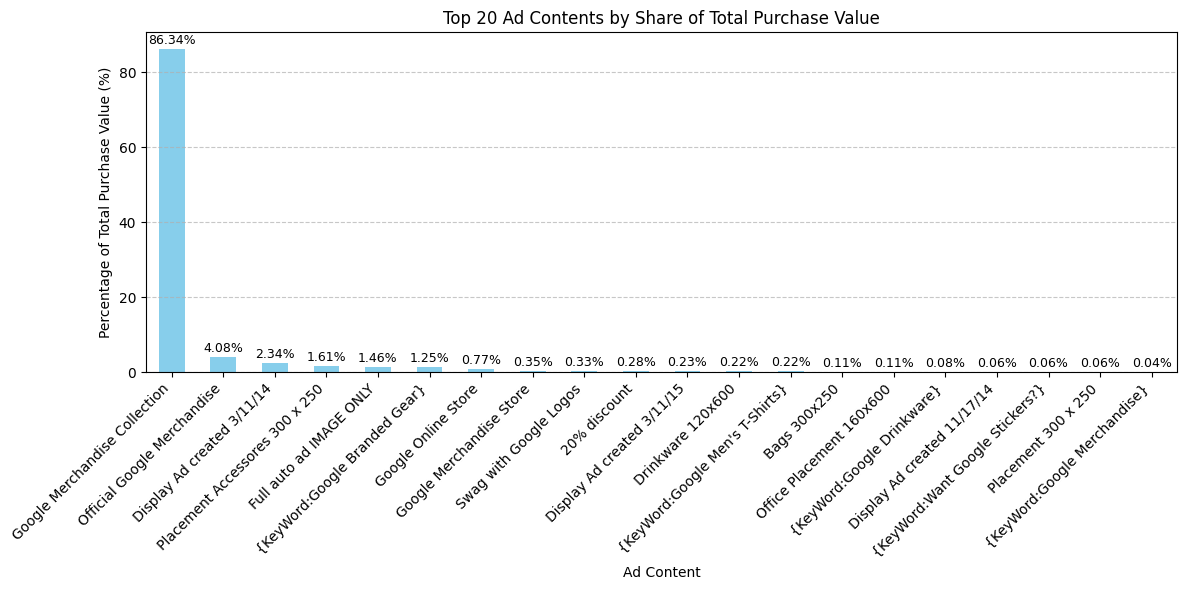

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Set feature and target
adcontent_col = 'trafficSource.adContent'
target_col = 'purchaseValue'
top_n = 20

# Group by adContent and sum purchaseValue
category_sum = df.groupby(adcontent_col)[target_col].sum()

# Convert to percentage share
category_share = (category_sum / category_sum.sum()) * 100

# Sort and take top N contributors
category_share = category_share.sort_values(ascending=False).head(top_n)

# Plot
plt.figure(figsize=(12, 6))
bars = category_share.plot(kind='bar', color='skyblue')
plt.ylabel('Percentage of Total Purchase Value (%)')
plt.xlabel('Ad Content')
plt.title(f'Top {top_n} Ad Contents by Share of Total Purchase Value')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate percentage values on top of each bar
for i, value in enumerate(category_share):
    plt.text(i, value + 0.5, f'{value:.2f}%', ha='center', va='bottom', fontsize=9)

plt.show()


In [32]:
df['purchaseValue'].equals(cdf['purchaseValue'])

True

In [33]:
cdf.columns

Index(['trafficSource.isTrueDirect', 'purchaseValue', 'browser',
       'device.screenResolution', 'trafficSource.adContent',
       'trafficSource.keyword', 'screenSize', 'geoCluster',
       'trafficSource.adwordsClickInfo.slot', 'device.mobileDeviceBranding',
       'device.mobileInputSelector', 'userId', 'trafficSource.campaign',
       'device.mobileDeviceMarketingName', 'geoNetwork.networkDomain',
       'gclIdPresent', 'device.operatingSystemVersion', 'sessionNumber',
       'device.flashVersion', 'geoNetwork.region', 'trafficSource',
       'totals.visits', 'geoNetwork.networkLocation', 'sessionId', 'os',
       'geoNetwork.subContinent', 'trafficSource.medium',
       'trafficSource.adwordsClickInfo.isVideoAd', 'browserMajor',
       'locationCountry', 'device.browserSize',
       'trafficSource.adwordsClickInfo.adNetworkType', 'socialEngagementType',
       'geoNetwork.city', 'trafficSource.adwordsClickInfo.page',
       'geoNetwork.metro', 'pageViews', 'locationZone',
      

In [34]:
cdf.describe().T

count          mean           std  \
purchaseValue                        116023.0  2.656393e+07  2.051825e+08   
userId                               116023.0  6.109436e+04  3.524076e+04   
gclIdPresent                         116023.0  3.701852e-02  1.888080e-01   
sessionNumber                        116023.0  2.691311e+00  1.045161e+01   
totals.visits                        116023.0  1.000000e+00  0.000000e+00   
sessionId                            116023.0  1.493429e+09  1.528798e+07   
trafficSource.adwordsClickInfo.page    4281.0  1.019622e+00  1.745165e-01   
pageViews                            116015.0  8.412352e+00  1.434494e+01   
locationZone                         116023.0  8.000000e+00  0.000000e+00   
totals.bounces                        47148.0  1.000000e+00  0.000000e+00   
date                                 116023.0  2.016860e+07  6.182322e+03   
totalHits                            116023.0  1.060737e+01  1.962958e+01   
sessionStart                         116023.0  1.493429e+09  1.528798e+07   
new_visits                            80518.0  1.000000e+00  0.000000e+00   

                                              min           25%           50%  \
purchaseValue                        0.000000e+00  0.000000e+00  0.000000e+00   
userId                               0.000000e+00  3.060350e+04  6.101400e+04   
gclIdPresent                         0.000000e+00  0.000000e+00  0.000000e+00   
sessionNumber                        1.000000e+00  1.000000e+00  1.000000e+00   
totals.visits                        1.000000e+00  1.000000e+00  1.000000e+00   
sessionId                            1.470035e+09  1.480066e+09  1.491646e+09   
trafficSource.adwordsClickInfo.page  1.000000e+00  1.000000e+00  1.000000e+00   
pageViews                            1.000000e+00  1.000000e+00  2.000000e+00   
locationZone                         8.000000e+00  8.000000e+00  8.000000e+00   
totals.bounces                       1.000000e+00  1.000000e+00  1.000000e+00   
date                                 2.016080e+07  2.016112e+07  2.017041e+07   
totalHits                            1.000000e+00  1.000000e+00  2.000000e+00   
sessionStart                         1.470035e+09  1.480066e+09  1.491646e+09   
new_visits                           1.000000e+00  1.000000e+00  1.000000e+00   

                                              75%           max  
purchaseValue                        0.000000e+00  2.312950e+10  
userId                               9.161650e+04  1.222760e+05  
gclIdPresent                         0.000000e+00  1.000000e+00  
sessionNumber                        2.000000e+00  4.470000e+02  
totals.visits                        1.000000e+00  1.000000e+00  
sessionId                            1.505079e+09  1.525157e+09  
trafficSource.adwordsClickInfo.page  1.000000e+00  5.000000e+00  
pageViews                            1.000000e+01  4.690000e+02  
locationZone                         8.000000e+00  8.000000e+00  
totals.bounces                       1.000000e+00  1.000000e+00  
date                                 2.017091e+07  2.018043e+07  
totalHits                            1.200000e+01  5.000000e+02  
sessionStart                         1.505079e+09  1.525157e+09  
new_visits                           1.000000e+00  1.000000e+00

In [35]:
cdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116023 entries, 0 to 116022
Data columns (total 52 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   trafficSource.isTrueDirect                    42890 non-null   object 
 1   purchaseValue                                 116023 non-null  float64
 2   browser                                       116023 non-null  object 
 3   device.screenResolution                       116023 non-null  object 
 4   trafficSource.adContent                       2963 non-null    object 
 5   trafficSource.keyword                         44162 non-null   object 
 6   screenSize                                    116023 non-null  object 
 7   geoCluster                                    116023 non-null  object 
 8   trafficSource.adwordsClickInfo.slot           4281 non-null    object 
 9   device.mobileDeviceBranding                   11

In [36]:
cdf['trafficSource'].value_counts()

trafficSource
google                         44332
(direct)                       36837
youtube.com                    19211
mall.googleplex.com             6388
analytics.google.com            1826
Partners                        1779
dfa                              617
sites.google.com                 533
google.com                       503
m.facebook.com                   365
baidu                            354
mail.google.com                  254
reddit.com                       234
facebook.com                     233
bing                             228
qiita.com                        187
groups.google.com                186
yahoo                            174
quora.com                        159
siliconvalley.about.com          151
t.co                             147
googleads.g.doubleclick.net      140
l.facebook.com                   116
dealspotr.com                    110
blog.golang.org                   70
gdeals.googleplex.com             58
plus.google.com         

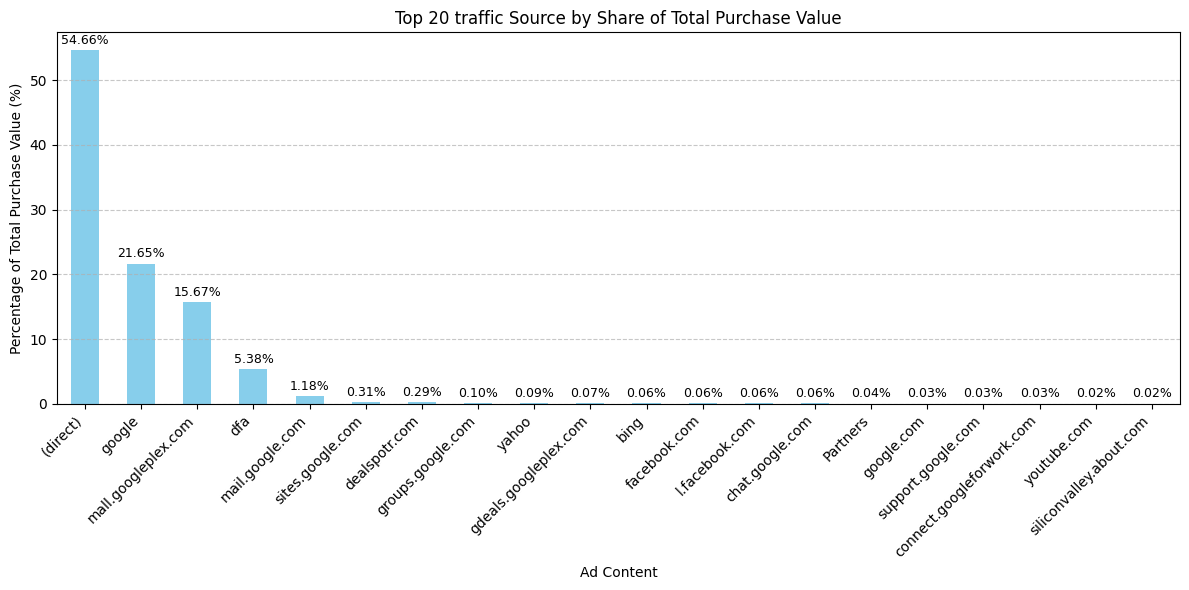

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# Set feature and target
adcontent_col = 'trafficSource'
target_col = 'purchaseValue'
top_n = 20

# Group by adContent and sum purchaseValue
category_sum = df.groupby(adcontent_col)[target_col].sum()

# Convert to percentage share
category_share = (category_sum / category_sum.sum()) * 100

# Sort and take top N contributors
category_share = category_share.sort_values(ascending=False).head(top_n)

# Plot
plt.figure(figsize=(12, 6))
bars = category_share.plot(kind='bar', color='skyblue')
plt.ylabel('Percentage of Total Purchase Value (%)')
plt.xlabel('Ad Content')
plt.title(f'Top {top_n} traffic Source by Share of Total Purchase Value')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate percentage values on top of each bar
for i, value in enumerate(category_share):
    plt.text(i, value + 0.5, f'{value:.2f}%', ha='center', va='bottom', fontsize=9)

plt.show()


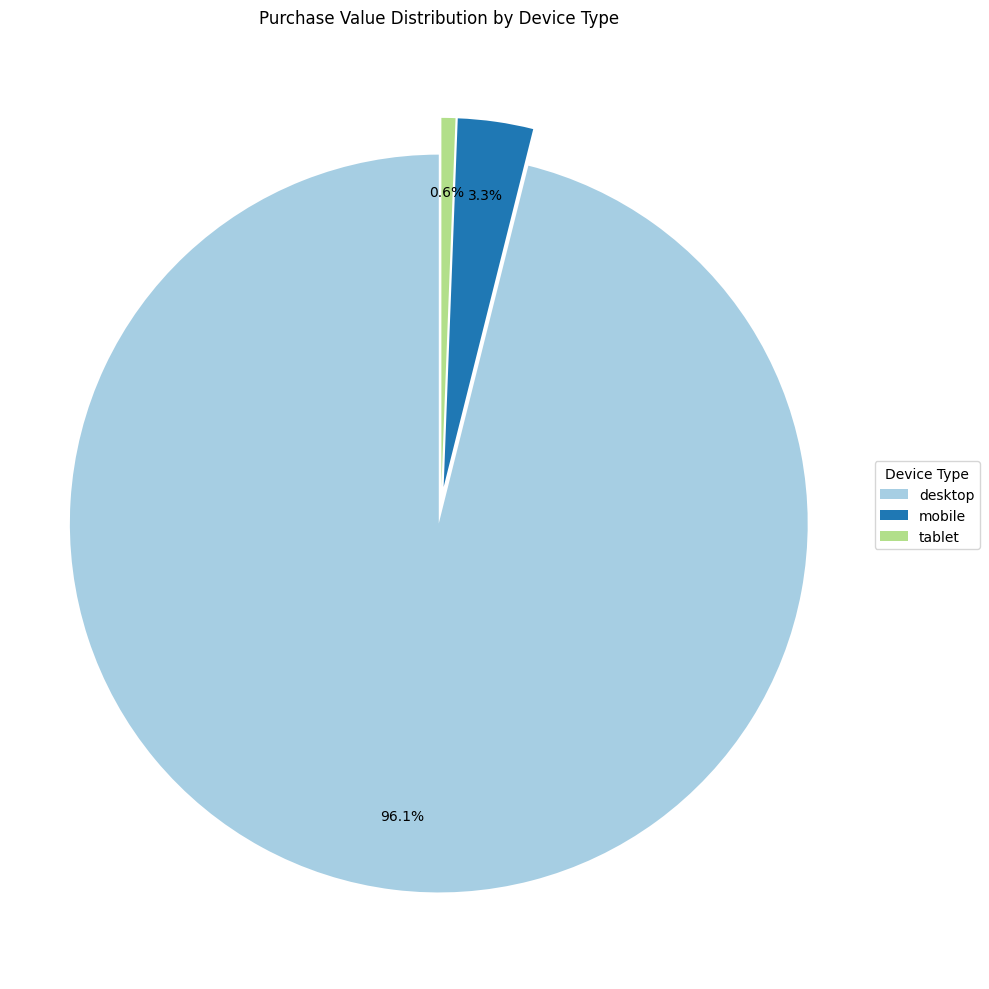

In [38]:
import matplotlib.pyplot as plt

# Group by deviceType and sum purchaseValue
device_purchase = cdf.groupby('deviceType')['purchaseValue'].sum().sort_values(ascending=False)

# Prepare explode list for better visibility
explode = [0.05] * len(device_purchase)  # Slightly separate all slices

# Plot pie chart with legend and better formatting
plt.figure(figsize=(10, 10))
wedges, texts, autotexts = plt.pie(
    device_purchase,
    labels=None,  # Hide default labels
    autopct='%1.1f%%',
    startangle=90,
    explode=explode,
    colors=plt.cm.Paired.colors,
    pctdistance=0.8  # Push percentage labels away from center
)

# Add legend outside the pie
plt.legend(wedges, device_purchase.index, title="Device Type", loc="center left", bbox_to_anchor=(1, 0.5))

# Improve text visibility
for text in autotexts:
    text.set_color('black')
    text.set_fontsize(10)

plt.title('Purchase Value Distribution by Device Type')
plt.axis('equal')  # Keep pie circular
plt.tight_layout()
plt.show()


In [39]:
cdf['browser'].value_counts()

browser
Chrome                                                  84508
Safari                                                  19184
Firefox                                                  4031
Internet Explorer                                        2155
Android Webview                                          1472
Edge                                                     1216
Safari (in-app)                                           793
Opera Mini                                                733
Samsung Internet                                          563
Opera                                                     548
UC Browser                                                296
YaBrowser                                                 187
Amazon Silk                                                73
Coc Coc                                                    61
Android Browser                                            59
Mozilla Compatible Agent                                   36


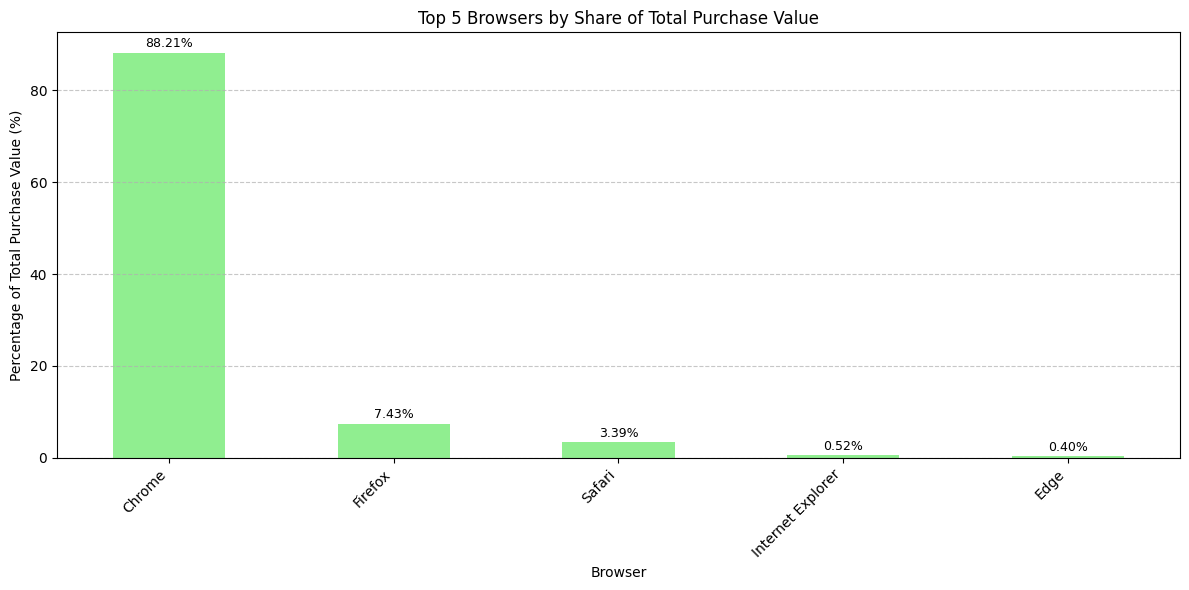

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# Set feature and target
browser_col = 'browser'
target_col = 'purchaseValue'
top_n = 5

# Group by browser and sum purchaseValue
browser_sum = cdf.groupby(browser_col)[target_col].sum()

# Convert to percentage share
browser_share = (browser_sum / browser_sum.sum()) * 100

# Sort and take top N contributors
browser_share = browser_share.sort_values(ascending=False).head(top_n)

# Plot
plt.figure(figsize=(12, 6))
bars = browser_share.plot(kind='bar', color='lightgreen')
plt.ylabel('Percentage of Total Purchase Value (%)')
plt.xlabel('Browser')
plt.title(f'Top {top_n} Browsers by Share of Total Purchase Value')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate percentage values on top of each bar
for i, value in enumerate(browser_share):
    plt.text(i, value + 0.5, f'{value:.2f}%', ha='center', va='bottom', fontsize=9)

plt.show()


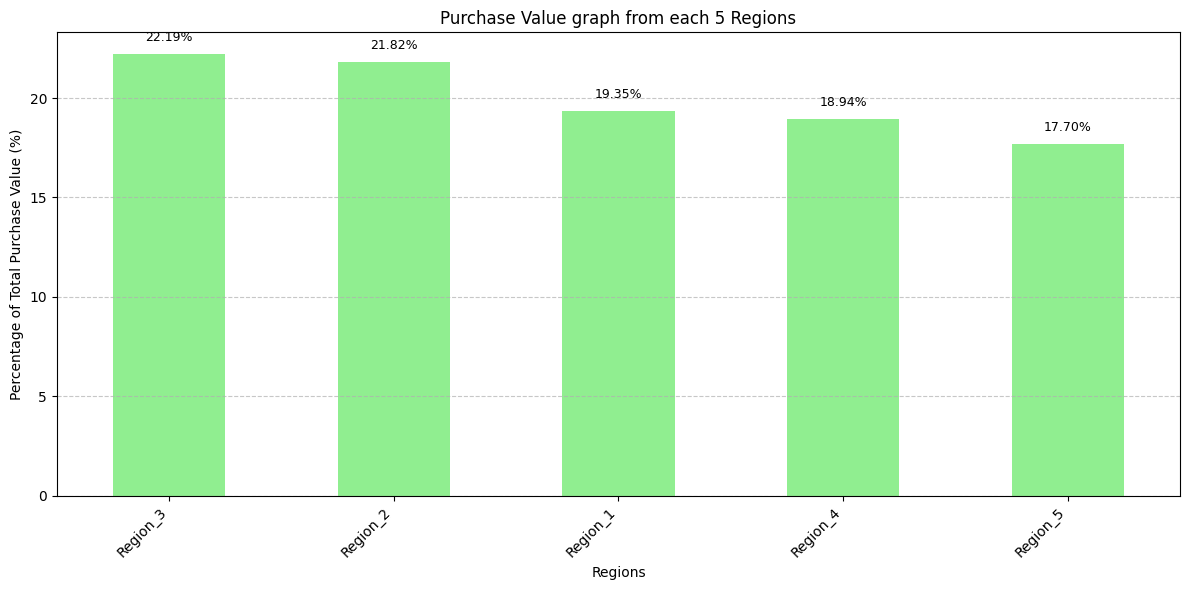

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

# Set feature and target
browser_col = 'geoCluster'
target_col = 'purchaseValue'

# Group by browser and sum purchaseValue
browser_sum = cdf.groupby(browser_col)[target_col].sum()

# Convert to percentage share
browser_share = (browser_sum / browser_sum.sum()) * 100

# Sort and take top N contributors
browser_share = browser_share.sort_values(ascending=False)

# Plot
plt.figure(figsize=(12, 6))
bars = browser_share.plot(kind='bar', color='lightgreen')
plt.ylabel('Percentage of Total Purchase Value (%)')
plt.xlabel('Regions')
plt.title(f'Purchase Value graph from each 5 Regions')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate percentage values on top of each bar
for i, value in enumerate(browser_share):
    plt.text(i, value + 0.5, f'{value:.2f}%', ha='center', va='bottom', fontsize=9)

plt.show()


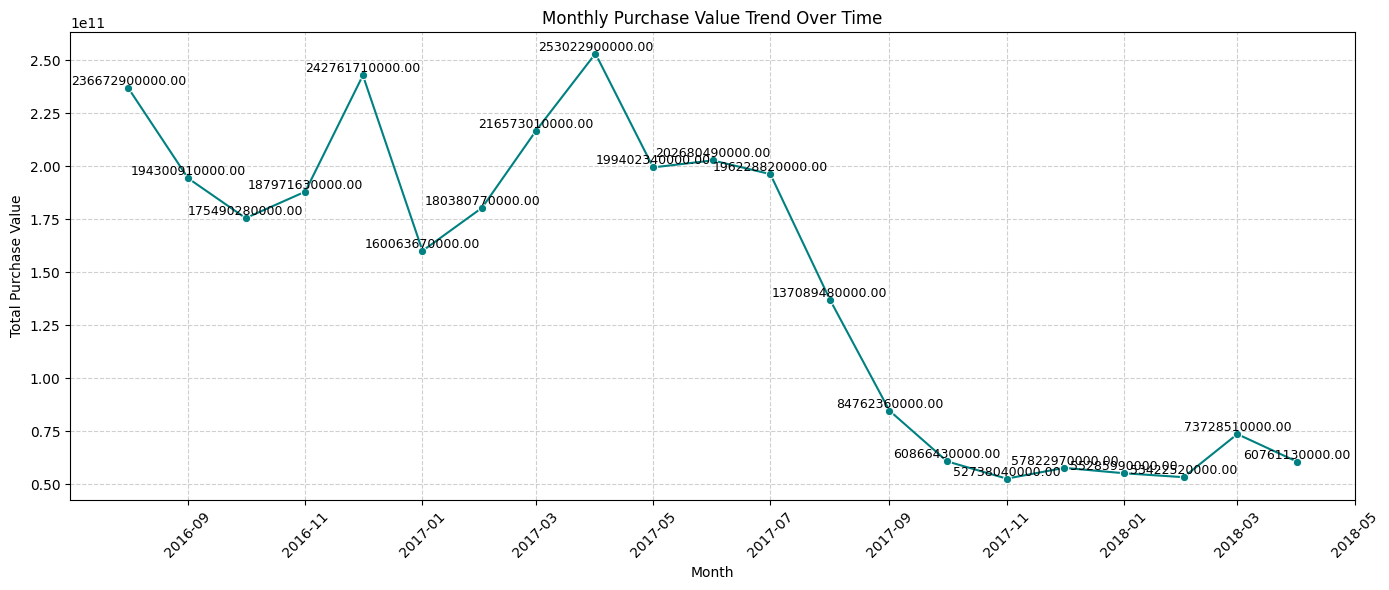

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Convert 'date' column to datetime format (in-place modification)
cdf['date'] = pd.to_datetime(cdf['date'], format='%Y%m%d', errors='coerce')

# Step 2: Create a new DataFrame for plotting without modifying the original cdf
monthly_purchase = (
    cdf.groupby(cdf['date'].dt.to_period('M'))['purchaseValue']
    .sum()
    .reset_index()
)

# Step 3: Convert the period to timestamp for plotting
monthly_purchase['date'] = monthly_purchase['date'].dt.to_timestamp()

# Step 4: Plot the trend
plt.figure(figsize=(14, 6))
sns.lineplot(x='date', y='purchaseValue', data=monthly_purchase, marker='o', color='teal')
plt.title('Monthly Purchase Value Trend Over Time')
plt.xlabel('Month')
plt.ylabel('Total Purchase Value')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)

# Annotate each point
for x, y in zip(monthly_purchase['date'], monthly_purchase['purchaseValue']):
    plt.text(x, y, f'{y:.2f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


In [43]:
cdf.shape

(116023, 52)

In [44]:
cdf['geoNetwork.region'].value_counts()

geoNetwork.region
not available in demo dataset        60138
California                           18122
New York                              5634
(not set)                             2806
Illinois                              1625
Texas                                 1600
Washington                            1494
England                               1408
Ontario                                781
Bangkok                                735
Maharashtra                            727
Taipei City                            640
Michigan                               633
Karnataka                              624
Massachusetts                          602
Delhi                                  589
Istanbul                               585
Ho Chi Minh                            547
Tamil Nadu                             504
New South Wales                        495
Georgia                                495
District of Columbia                   488
Ile-de-France                       

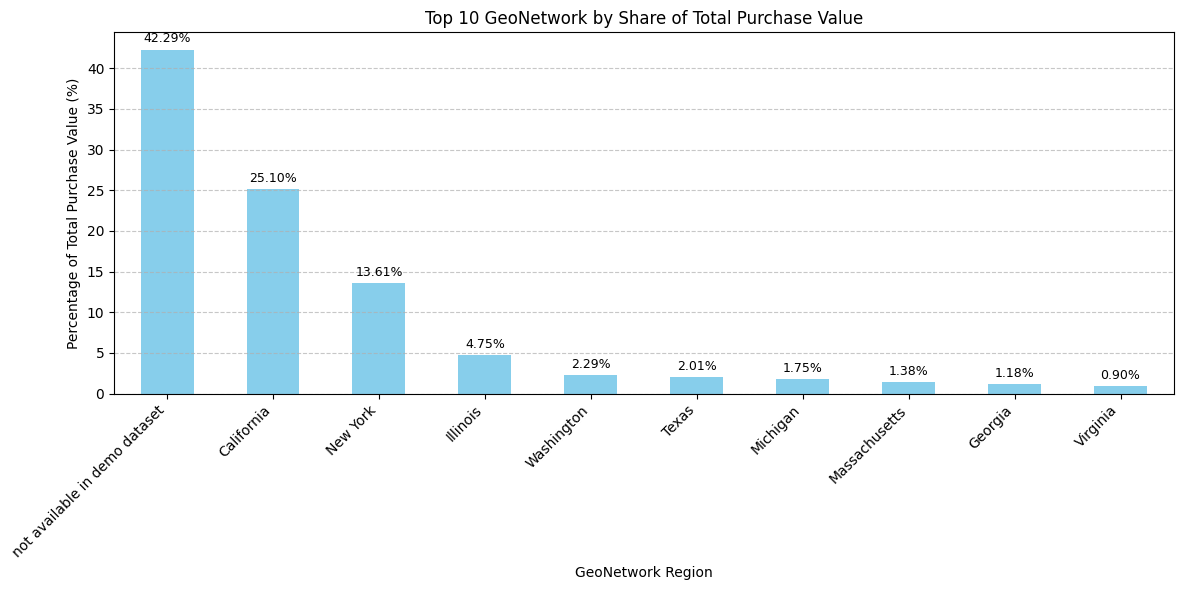

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

# Set feature and target
adcontent_col = 'geoNetwork.region'
target_col = 'purchaseValue'
top_n = 10

# Group by adContent and sum purchaseValue
category_sum = df.groupby(adcontent_col)[target_col].sum()

# Convert to percentage share
category_share = (category_sum / category_sum.sum()) * 100

# Sort and take top N contributors
category_share = category_share.sort_values(ascending=False).head(top_n)

# Plot
plt.figure(figsize=(12, 6))
bars = category_share.plot(kind='bar', color='skyblue')
plt.ylabel('Percentage of Total Purchase Value (%)')
plt.xlabel('GeoNetwork Region')
plt.title(f'Top {top_n} GeoNetwork by Share of Total Purchase Value')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate percentage values on top of each bar
for i, value in enumerate(category_share):
    plt.text(i, value + 0.5, f'{value:.2f}%', ha='center', va='bottom', fontsize=9)

plt.show()


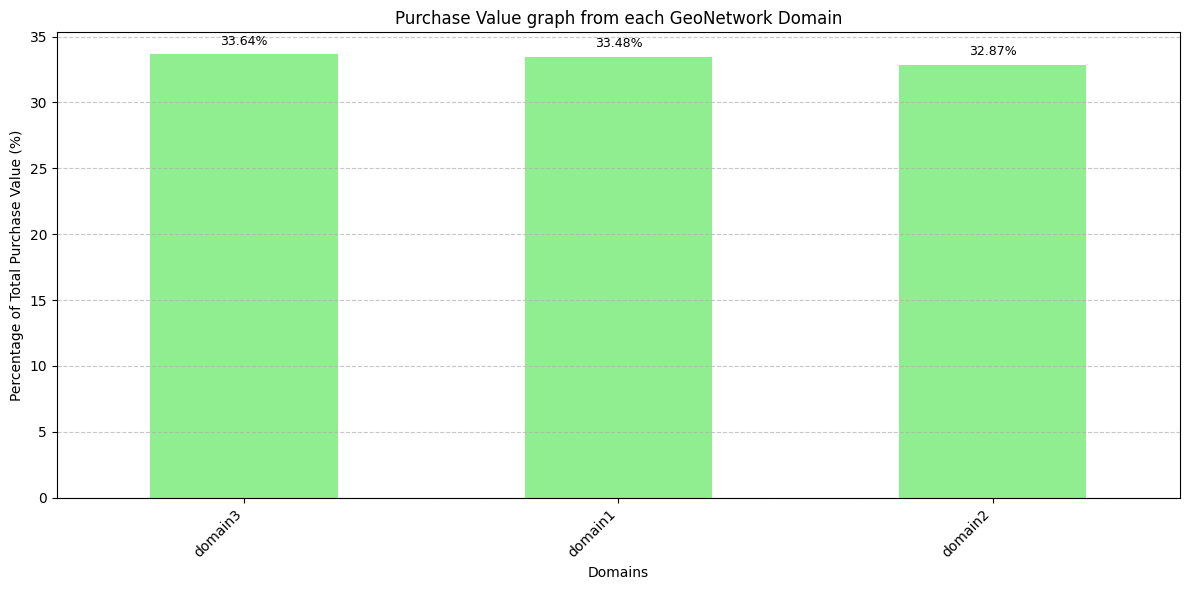

In [46]:
import pandas as pd
import matplotlib.pyplot as plt

# Set feature and target
browser_col = 'geoNetwork.networkDomain'
target_col = 'purchaseValue'

# Group by browser and sum purchaseValue
browser_sum = cdf.groupby(browser_col)[target_col].sum()

# Convert to percentage share
browser_share = (browser_sum / browser_sum.sum()) * 100

# Sort and take top N contributors
browser_share = browser_share.sort_values(ascending=False)

# Plot
plt.figure(figsize=(12, 6))
bars = browser_share.plot(kind='bar', color='lightgreen')
plt.ylabel('Percentage of Total Purchase Value (%)')
plt.xlabel('Domains')
plt.title(f'Purchase Value graph from each GeoNetwork Domain')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate percentage values on top of each bar
for i, value in enumerate(browser_share):
    plt.text(i, value + 0.5, f'{value:.2f}%', ha='center', va='bottom', fontsize=9)

plt.show()


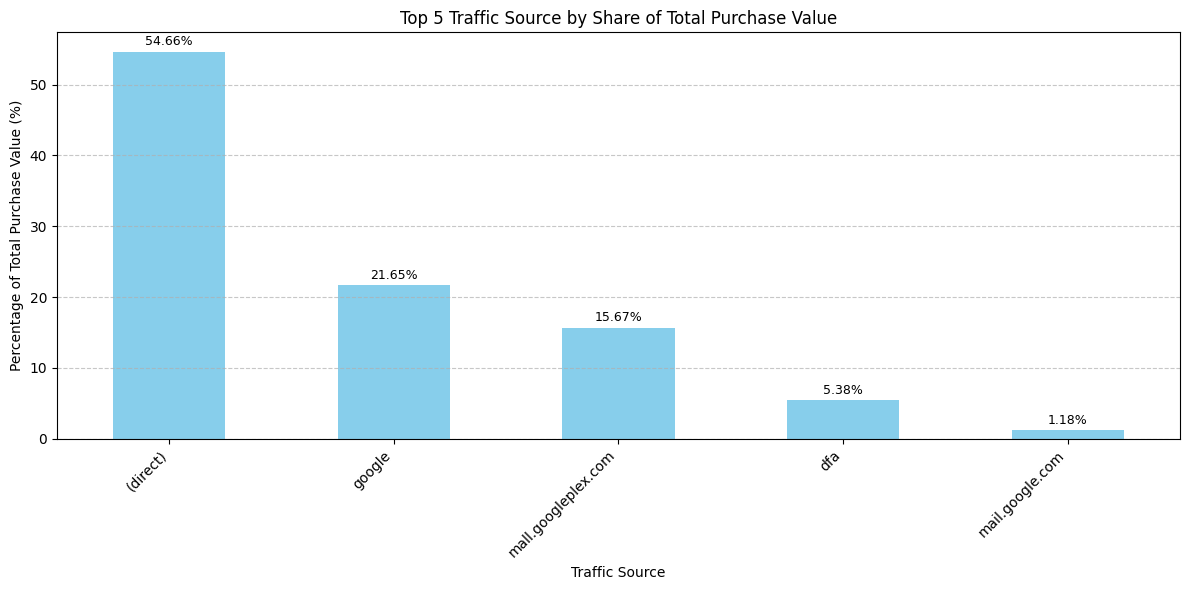

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

# Set feature and target
adcontent_col = 'trafficSource'
target_col = 'purchaseValue'
top_n = 5

# Group by adContent and sum purchaseValue
category_sum = df.groupby(adcontent_col)[target_col].sum()

# Convert to percentage share
category_share = (category_sum / category_sum.sum()) * 100

# Sort and take top N contributors
category_share = category_share.sort_values(ascending=False).head(top_n)

# Plot
plt.figure(figsize=(12, 6))
bars = category_share.plot(kind='bar', color='skyblue')
plt.ylabel('Percentage of Total Purchase Value (%)')
plt.xlabel('Traffic Source')
plt.title(f'Top {top_n} Traffic Source by Share of Total Purchase Value')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate percentage values on top of each bar
for i, value in enumerate(category_share):
    plt.text(i, value + 0.5, f'{value:.2f}%', ha='center', va='bottom', fontsize=9)

plt.show()


In [48]:
cdf.shape

(116023, 52)

In [49]:
cdf.select_dtypes(include=['int64', 'float64', 'bool']).nunique()

purchaseValue                            6766
userId                                 100499
gclIdPresent                                2
sessionNumber                             230
totals.visits                               1
sessionId                              107379
trafficSource.adwordsClickInfo.page         5
pageViews                                 175
locationZone                                1
totals.bounces                              1
totalHits                                 225
sessionStart                           107388
device.isMobile                             2
new_visits                                  1
dtype: int64

In [50]:
cdf.select_dtypes(include=['object']).nunique()

trafficSource.isTrueDirect                        1
browser                                          34
device.screenResolution                           1
trafficSource.adContent                          53
trafficSource.keyword                           566
screenSize                                        1
geoCluster                                        5
trafficSource.adwordsClickInfo.slot               3
device.mobileDeviceBranding                       1
device.mobileInputSelector                        1
trafficSource.campaign                           28
device.mobileDeviceMarketingName                  1
geoNetwork.networkDomain                          3
device.operatingSystemVersion                     1
device.flashVersion                               1
geoNetwork.region                               388
trafficSource                                   161
geoNetwork.networkLocation                        1
os                                               18
geoNetwork.s

In [51]:
cdf.shape

(116023, 52)

### Currently our dataset has 35 Categorical Variables, 16 Numerical Columns and 1 Datetime type column, which eventually sums upto 52 columns

In [52]:
cdf.dtypes.value_counts()

object            37
int64              8
float64            5
datetime64[ns]     1
bool               1
Name: count, dtype: int64

In [53]:
cat_feature = cdf.select_dtypes(include='object').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116023 entries, 0 to 116022
Data columns (total 37 columns):
 #   Column                                        Non-Null Count   Dtype 
---  ------                                        --------------   ----- 
 0   trafficSource.isTrueDirect                    42890 non-null   object
 1   browser                                       116023 non-null  object
 2   device.screenResolution                       116023 non-null  object
 3   trafficSource.adContent                       2963 non-null    object
 4   trafficSource.keyword                         44162 non-null   object
 5   screenSize                                    116023 non-null  object
 6   geoCluster                                    116023 non-null  object
 7   trafficSource.adwordsClickInfo.slot           4281 non-null    object
 8   device.mobileDeviceBranding                   116023 non-null  object
 9   device.mobileInputSelector                    116023 non-nu

In [54]:
cat_feature = cdf.select_dtypes(include='object').columns
cat_feature

Index(['trafficSource.isTrueDirect', 'browser', 'device.screenResolution',
       'trafficSource.adContent', 'trafficSource.keyword', 'screenSize',
       'geoCluster', 'trafficSource.adwordsClickInfo.slot',
       'device.mobileDeviceBranding', 'device.mobileInputSelector',
       'trafficSource.campaign', 'device.mobileDeviceMarketingName',
       'geoNetwork.networkDomain', 'device.operatingSystemVersion',
       'device.flashVersion', 'geoNetwork.region', 'trafficSource',
       'geoNetwork.networkLocation', 'os', 'geoNetwork.subContinent',
       'trafficSource.medium', 'trafficSource.adwordsClickInfo.isVideoAd',
       'browserMajor', 'locationCountry', 'device.browserSize',
       'trafficSource.adwordsClickInfo.adNetworkType', 'socialEngagementType',
       'geoNetwork.city', 'geoNetwork.metro', 'device.mobileDeviceModel',
       'trafficSource.referralPath', 'device.language', 'deviceType',
       'userChannel', 'device.browserVersion', 'device.screenColors',
       'geoNetwor

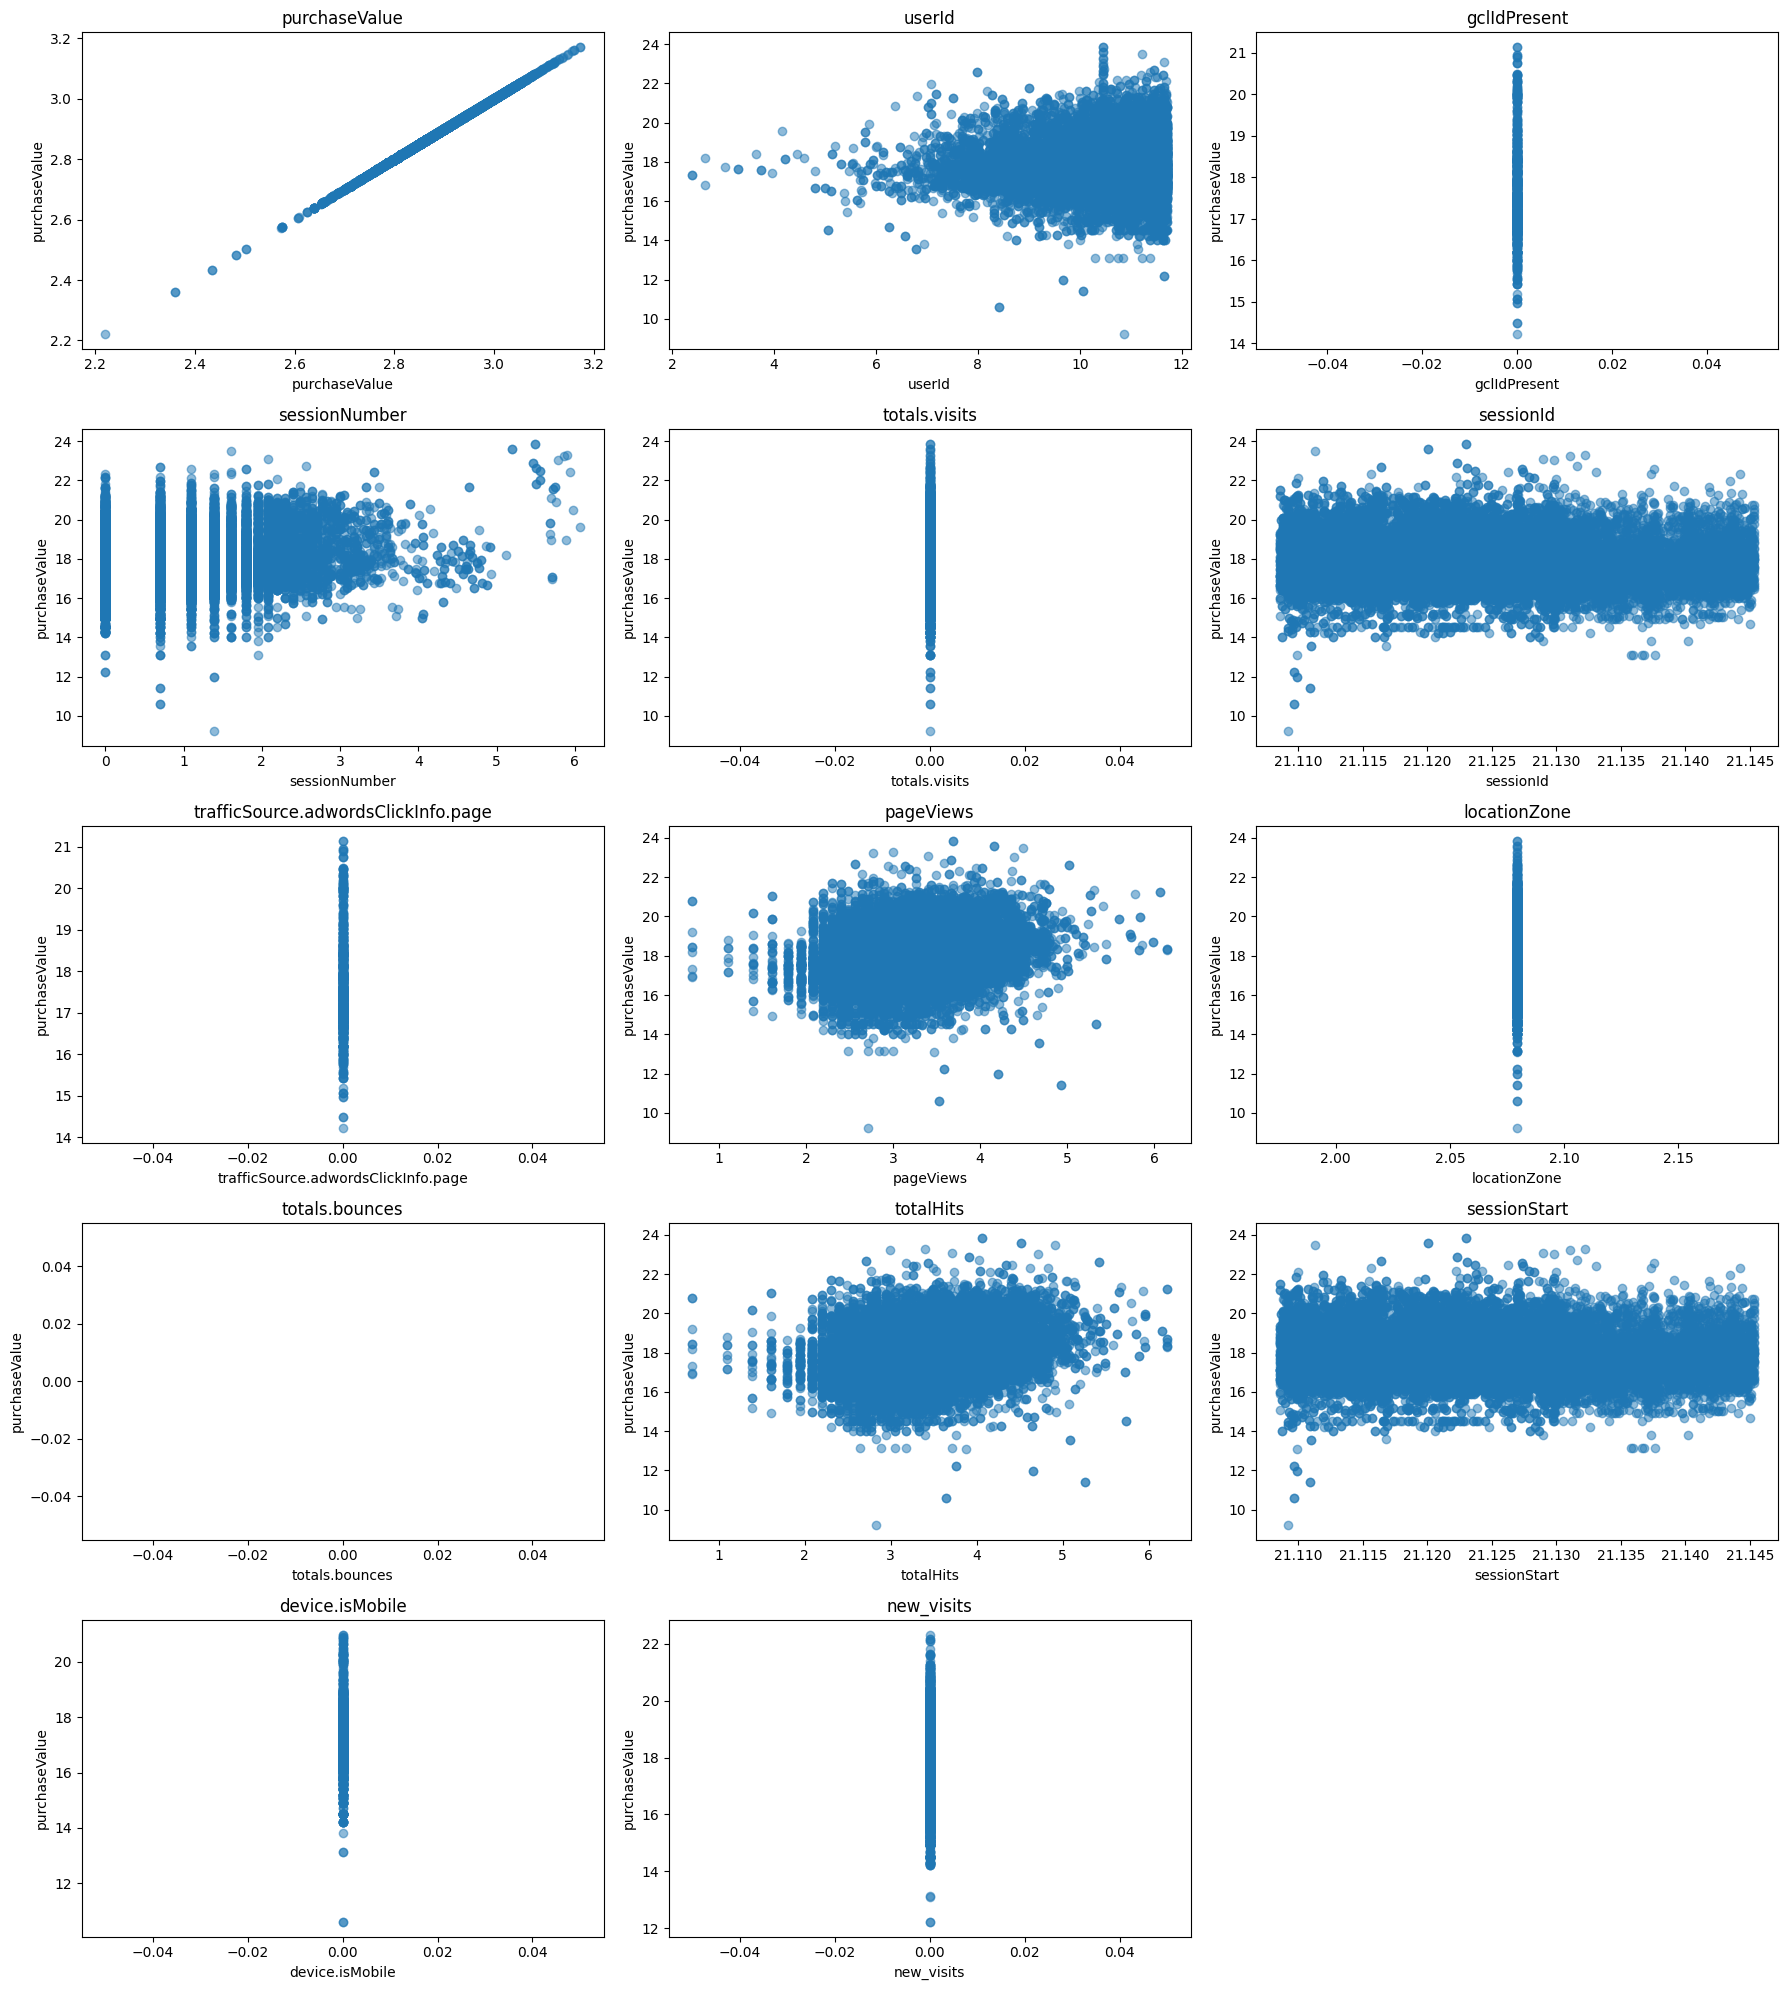

In [55]:
import matplotlib.pyplot as plt
import numpy as np

numerical_features = cdf.select_dtypes(include=['int64', 'float64', 'bool']).columns

# Define grid size
n_features = len(numerical_features)
n_cols = 3  # Number of columns in the grid
n_rows = (n_features + n_cols - 1) // n_cols  # Ceiling division for rows

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 6, n_rows * 4))
axes = axes.flatten()  # Flatten to 1D for easy indexing

# Plot each scatter plot
for idx, feature in enumerate(numerical_features):
    data = cdf.copy()
    # Avoid log(0) and log of negative numbers
    data = data[(data[feature] > 0) & (data['purchaseValue'] > 0)]
    data[feature] = np.log(data[feature])
    data['purchaseValue'] = np.log(data['purchaseValue'])

    axes[idx].scatter(data[feature], data['purchaseValue'], alpha=0.5)
    axes[idx].set_xlabel(feature)
    axes[idx].set_ylabel('purchaseValue')
    axes[idx].set_title(feature)

# Turn off any unused subplots
for j in range(idx + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


## Feature Engineering & Feature Selection on Dataset to select the best features out of the pool.

In [56]:
cdf.head(200)

trafficSource.isTrueDirect  purchaseValue            browser  \
0                          NaN   0.000000e+00               Edge   
1                         True   0.000000e+00             Chrome   
2                         True   0.000000e+00             Chrome   
3                          NaN   0.000000e+00  Internet Explorer   
4                         True   8.895000e+07             Chrome   
5                         True   2.800000e+07             Chrome   
6                          NaN   8.051000e+07             Chrome   
7                          NaN   0.000000e+00             Chrome   
8                         True   0.000000e+00             Chrome   
9                          NaN   0.000000e+00             Safari   
10                        True   0.000000e+00             Chrome   
11                         NaN   0.000000e+00             Chrome   
12                         NaN   0.000000e+00             Chrome   
13                         NaN   0.000000e+00    Android Webview   
14                         NaN   0.000000e+00             Safari   
15                         NaN   0.000000e+00             Chrome   
16                        True   0.000000e+00            Firefox   
17                         NaN   0.000000e+00             Chrome   
18                        True   0.000000e+00             Chrome   
19                         NaN   0.000000e+00             Safari   
20                         NaN   6.000000e+06             Safari   
21                        True   3.114000e+07             Chrome   
22                        True   0.000000e+00             Chrome   
23                         NaN   0.000000e+00             Chrome   
24                         NaN   0.000000e+00             Chrome   
25                         NaN   0.000000e+00             Safari   
26                        True   2.718000e+07             Chrome   
27                         NaN   0.000000e+00             Chrome   
28                        True   0.000000e+00             Chrome   
29                        True   0.000000e+00             Safari   
30                        True   0.000000e+00             Chrome   
31                        True   7.999000e+07             Chrome   
32                         NaN   0.000000e+00             Chrome   
33                         NaN   0.000000e+00             Safari   
34                         NaN   0.000000e+00             Chrome   
35                        True   6.939000e+07            Firefox   
36                        True   0.000000e+00             Chrome   
37                         NaN   0.000000e+00             Chrome   
38                        True   3.998000e+07             Chrome   
39                        True   1.589400e+09             Chrome   
40                         NaN   0.000000e+00             Chrome   
41                         NaN   0.000000e+00             Chrome   
42                         NaN   2.718000e+07             Chrome   
43                        True   1.329000e+07             Chrome   
44                         NaN   0.000000e+00             Safari   
45                         NaN   0.000000e+00             Chrome   
46                        True   2.399000e+07             Chrome   
47                        True   0.000000e+00             Safari   
48                        True   0.000000e+00             Chrome   
49                        True   0.000000e+00             Chrome   
50                         NaN   0.000000e+00             Chrome   
51                         NaN   0.000000e+00            Firefox   
52                         NaN   0.000000e+00             Chrome   
53                         NaN   0.000000e+00             Chrome   
54                        True   0.000000e+00             Chrome   
55                        True   8.398000e+07             Chrome   
56                         NaN   0.000000e+00             Chrome   
57                         NaN   0.000000e+00             Ch

In [57]:
cdf[categorical_features].isnull().sum()

trafficSource.isTrueDirect                       73133
browser                                              0
device.screenResolution                              0
trafficSource.adContent                         113060
trafficSource.keyword                            71861
screenSize                                           0
geoCluster                                           0
trafficSource.adwordsClickInfo.slot             111742
device.mobileDeviceBranding                          0
device.mobileInputSelector                           0
trafficSource.campaign                               0
device.mobileDeviceMarketingName                     0
geoNetwork.networkDomain                             0
device.operatingSystemVersion                        0
device.flashVersion                                  0
geoNetwork.region                                    0
trafficSource                                        0
geoNetwork.networkLocation                           0
os        

In [58]:
cdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116023 entries, 0 to 116022
Data columns (total 52 columns):
 #   Column                                        Non-Null Count   Dtype         
---  ------                                        --------------   -----         
 0   trafficSource.isTrueDirect                    42890 non-null   object        
 1   purchaseValue                                 116023 non-null  float64       
 2   browser                                       116023 non-null  object        
 3   device.screenResolution                       116023 non-null  object        
 4   trafficSource.adContent                       2963 non-null    object        
 5   trafficSource.keyword                         44162 non-null   object        
 6   screenSize                                    116023 non-null  object        
 7   geoCluster                                    116023 non-null  object        
 8   trafficSource.adwordsClickInfo.slot           4281 non

In [59]:
cdf.shape

(116023, 52)

In [60]:
#dropping duplicate rows
cdf.drop_duplicates(inplace=True)
cdf.shape

(115787, 52)

In [61]:
# Seperating X data and y target variable
X = cdf.drop(columns=['purchaseValue'])
y = cdf['purchaseValue']

In [62]:
#Total duplicate rows present in dataset
print('Total duplicate rows present in dataset:', df.duplicated().sum())

Total duplicate rows present in dataset: 236


In [63]:
X['date'] = pd.to_datetime(X['date'])
X['year'] = X['date'].dt.year
X['month'] = X['date'].dt.month
X.drop(columns=['date'], inplace=True)

### Irrelevant Feature Removal. We are removing 2 Set of columns
- 1st We are removing those columns which have high null count, as high null count will not contribute to our regressor model to learn any pattern or anything useful.
- 2nd We are removing those columns who have 1 dominance value in our dataset as it will also work the same way like the first point. One dominant value in a column will lack the variance in our column and hence it will not help our model to learn anything.

In [64]:
from sklearn.base import BaseEstimator, TransformerMixin
import pandas as pd

class IrrelevantColumnDropper(BaseEstimator, TransformerMixin):
    def __init__(self, null_threshold=0.4, dominance_threshold=0.95, verbose=False):
        self.null_threshold = null_threshold
        self.dominance_threshold = dominance_threshold
        self.verbose = verbose
        self.irrelevant_null_cols_ = []
        self.irrelevant_dominant_cols_ = []
        self.all_irrelevant_cols_ = []

    def fit(self, X, y=None):
        # Ensure input is a DataFrame
        if not isinstance(X, pd.DataFrame):
            raise ValueError("Input X must be a pandas DataFrame")

        # Columns with too many nulls
        null_proportion = X.isnull().mean()
        self.irrelevant_null_cols_ = null_proportion[null_proportion > self.null_threshold].index.tolist()

        # Columns dominated by a single value
        dominance_check = X.apply(
            lambda col: col.value_counts(normalize=True, dropna=False).max() > self.dominance_threshold
        )
        self.irrelevant_dominant_cols_ = X.columns[dominance_check].tolist()

        # Combine and deduplicate
        self.all_irrelevant_cols_ = list(set(self.irrelevant_null_cols_ + self.irrelevant_dominant_cols_))

        if self.verbose:
            print("Columns with high nulls (> {:.0%}):".format(self.null_threshold), self.irrelevant_null_cols_)
            print("Columns with dominant value (> {:.0%} one value):".format(self.dominance_threshold), self.irrelevant_dominant_cols_)
            print("✅ Unique columns to drop:", self.all_irrelevant_cols_)
            print("🔢 Count of unique columns to drop:", len(self.all_irrelevant_cols_))

        return self

    def transform(self, X):
        # Drop columns and return the result
        X_transformed = X.drop(columns=self.all_irrelevant_cols_, errors='ignore')
        if self.verbose:
            print("📐 Shape after dropping irrelevant columns:", X_transformed.shape)
        return X_transformed


### Imputting and Scalling our Columns with Mean for Numerical Columns and with Mode for Categorical Columns



In [65]:
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin

class ImputerTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, cat_fill_value='Missing', verbose=False):
        self.verbose = verbose
        self.cat_fill_value = cat_fill_value
        self.num_fill_values_ = {}
        self.numerical_cols_ = []
        self.categorical_cols_ = []

    def fit(self, X, y=None):
        if not isinstance(X, pd.DataFrame):
            raise ValueError("Input must be a pandas DataFrame")

        self.numerical_cols_ = X.select_dtypes(include=['int64', 'float64', 'bool']).columns.tolist()
        self.categorical_cols_ = X.select_dtypes(include=['object', 'category']).columns.tolist()

        # Compute mean for numerical columns
        for col in self.numerical_cols_:
            if X[col].isnull().any():
                self.num_fill_values_[col] = X[col].mean()

        if self.verbose:
            print("🧩 Numerical columns (mean impute):", list(self.num_fill_values_.keys()))
            print("🧩 Categorical columns (fill with '{}'):".format(self.cat_fill_value), self.categorical_cols_)
            print("🧩 Numerical mean fill values:", self.num_fill_values_)

        return self

    def transform(self, X):
        X = X

        # Impute numerical columns
        for col, mean_val in self.num_fill_values_.items():
            if col in X.columns:
                X[col] = X[col].fillna(mean_val)

        # Impute categorical columns with constant value
        for col in self.categorical_cols_:
            if col in X.columns:
                X[col] = X[col].fillna(self.cat_fill_value)

        return X


#### As we have seen from the histogram plot of our above the numerical columns doesn't follow a normal distribution so it's better to Scale our numerical feature by Min-Max Scaler, We're not using Standard Scaler here as it's a good practice to use it when your numerical data is already normalized but as our data itself is not following the normal distribution we should be scalling our numrical feature by "Min-Max Scaler".

In [66]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

class MinMaxScalerTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.scaler = MinMaxScaler()
        self.numeric_features = None

    def fit(self, X, y=None):
        """Identify numerical columns and fit the MinMaxScaler."""
        self.numeric_features = X.select_dtypes(include=['int32', 'int64', 'float64']).columns
        self.scaler.fit(X[self.numeric_features])
        return self

    def transform(self, X):
        """Apply MinMax scaling only to numerical columns, keeping the rest unchanged."""
        X[self.numeric_features] = np.round(self.scaler.transform(X[self.numeric_features]), 2)
        return X

### Count of preserved columns in all categories Categorical, Numerical and Binary

In [67]:
from sklearn.base import BaseEstimator, TransformerMixin
import pandas as pd

class RareCategoryGrouper(BaseEstimator, TransformerMixin):
    def __init__(self, threshold=0.01, verbose=True):
        self.threshold = threshold
        self.verbose = verbose
        self.rare_categories_ = {}
        self.categorical_features_ = []

    def fit(self, X, y=None):
        if not isinstance(X, pd.DataFrame):
            raise ValueError("Input X must be a pandas DataFrame")

        # Auto-detect categorical (object or category) columns
        self.categorical_features_ = X.select_dtypes(include=['object', 'category']).columns.tolist()

        for col in self.categorical_features_:
            freq_pct = X[col].value_counts(normalize=True)
            rare_cats = freq_pct[freq_pct < self.threshold].index
            self.rare_categories_[col] = set(rare_cats)
        return self

    def transform(self, X):
        X_transformed = X
        for col, rare_set in self.rare_categories_.items():
            if col in X_transformed.columns:
                X_transformed[col] = X_transformed[col].apply(lambda x: 'Rare' if x in rare_set else x)

        if self.verbose:
            print("✅ Rare category replacement complete.")

        return X_transformed


#### In regression problems, using label encoding for high-cardinality nominal features can be misleading because it introduces artificial ordinal relationships between categories. This can cause the model to infer patterns that don’t exist, especially in linear models, and may lead to multicollinearity issues.

#### Instead, frequency encoding or relative frequency encoding is a better choice for such cases. These methods replace categories with their occurrence proportion, preserving their categorical nature without imposing order. This helps regression models make more meaningful predictions without false assumptions.

In [68]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import numpy as np

class LowCardinalityOHE(BaseEstimator, TransformerMixin):
    def __init__(self, max_unique=10, drop='first', sparse=True, verbose=True):
        self.max_unique = max_unique
        self.drop = drop
        self.sparse = sparse
        self.verbose = verbose

    def fit(self, X, y=None):
        X_cat = X.select_dtypes(include=['object', 'category','bool'])
        nunique = X_cat.nunique()
        self.ohe_cols_ = nunique[nunique <= self.max_unique].index.tolist()

        if self.verbose:
            print("🔠 Low-cardinality columns to one-hot encode:", self.ohe_cols_)

        self.ohe_ = OneHotEncoder(sparse_output=self.sparse, drop=self.drop, handle_unknown='ignore')
        self.ohe_.fit(X[self.ohe_cols_])
        return self

    def transform(self, X):
        X_transformed = X
        if not self.ohe_cols_:
            return X_transformed

        ohe_features = self.ohe_.transform(X[self.ohe_cols_])
        ohe_df = pd.DataFrame(
            ohe_features.toarray() if hasattr(ohe_features, "toarray") else ohe_features,
            columns=self.ohe_.get_feature_names_out(self.ohe_cols_),
            index=X.index
        )

        X_transformed = X_transformed.drop(columns=self.ohe_cols_)
        X_transformed = pd.concat([X_transformed, ohe_df], axis=1)
        return X_transformed

class HighCardinalityFreqEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, min_unique=11, verbose=True):
        self.min_unique = min_unique
        self.verbose = verbose
        self.freq_maps_ = {}

    def fit(self, X, y=None):
        # Automatically detect object or category dtype columns
        X_cat = X.select_dtypes(include=['object', 'category'])

        # Identify high-cardinality columns
        nunique = X_cat.nunique()
        self.freq_cols_ = nunique[nunique >= self.min_unique].index.tolist()

        if self.verbose:
            print("📊 High-cardinality columns to frequency encode:", self.freq_cols_)

        # Store frequency maps
        for col in self.freq_cols_:
            freq = X[col].value_counts(normalize=True)
            self.freq_maps_[col] = freq

        return self

    def transform(self, X):
        X_transformed = X
        for col in self.freq_cols_:
            freq_map = self.freq_maps_.get(col, pd.Series())
            X_transformed[col] = X_transformed[col].map(freq_map).fillna(0).round(2)
        return X_transformed


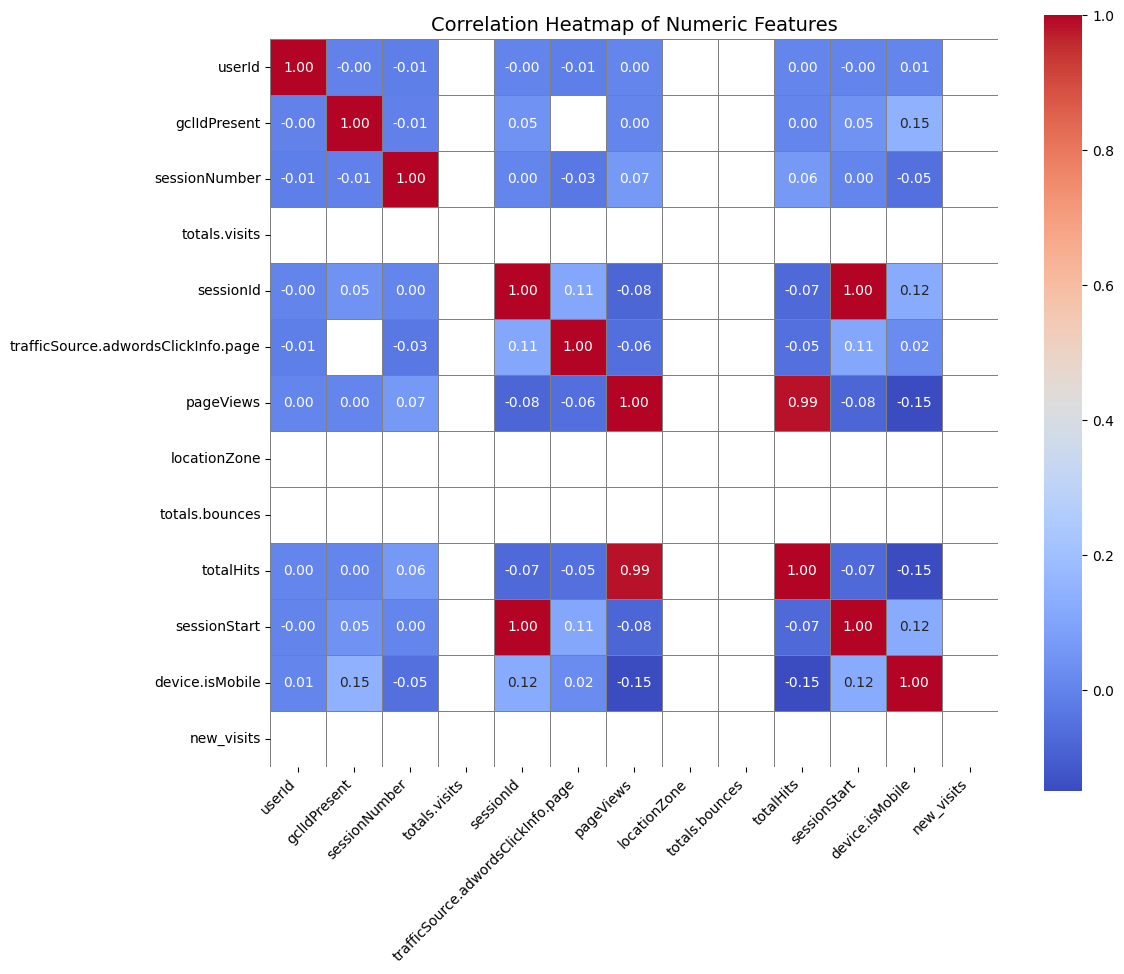

In [69]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Select only numeric columns
numeric_df = X.select_dtypes(include=['int64', 'float64', 'bool'])

# Step 2: Compute correlation matrix
cor_matrix = numeric_df.corr()

# Step 3: Plot full heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(cor_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True,
            linewidths=0.5, linecolor='gray', square=True)

plt.title('Correlation Heatmap of Numeric Features', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


#### There are 6 columns which are present in our dataset with really low correlation coefficient ranging between -0.02 to 0.02 with our target variable "purchaseValue", So it's better to drop them instead taking it in use as it doesn't have any significant contribution to our target variable.

#### Below are the names of all the columsn which we are going to be dropped
- UserId

- SessionID

- Session Start

#### These columns have really low correlation also they doesn't make any sense in contribution towards pattern prediction and insights based on the info they hold!!!
#### So it's better to drop them from our dataset as the part of data cleaning.

In [70]:
from sklearn.base import BaseEstimator, TransformerMixin

class LowCorrelationFilter(BaseEstimator, TransformerMixin):
    def __init__(self, threshold=0.02, plot_heatmap=True, verbose=True):
        self.threshold = threshold
        self.plot_heatmap = plot_heatmap
        self.verbose = verbose
        self.low_corr_cols_ = []

    def fit(self, X, y=None):
        if not isinstance(X, pd.DataFrame):
            raise ValueError("X must be a pandas DataFrame")
        if y is None:
            raise ValueError("Target y must be provided")

        numeric_df = X.select_dtypes(include=['int64', 'float64', 'bool'])
        self.target_corr_ = numeric_df.corrwith(y)
        self.low_corr_cols_ = self.target_corr_[
            (self.target_corr_ >= -self.threshold) & (self.target_corr_ <= self.threshold)
        ].index.tolist()

        if self.verbose:
            print("🧹 Dropping low correlation columns:", self.low_corr_cols_)

        return self

    def transform(self, X):
        return X.drop(columns=self.low_corr_cols_, errors='ignore')

In [71]:
#Total number of remaining binary columns
binary_columns = X.select_dtypes(include=['bool']).columns
print(binary_columns)
print(len(binary_columns))

Index(['device.isMobile'], dtype='object')
1


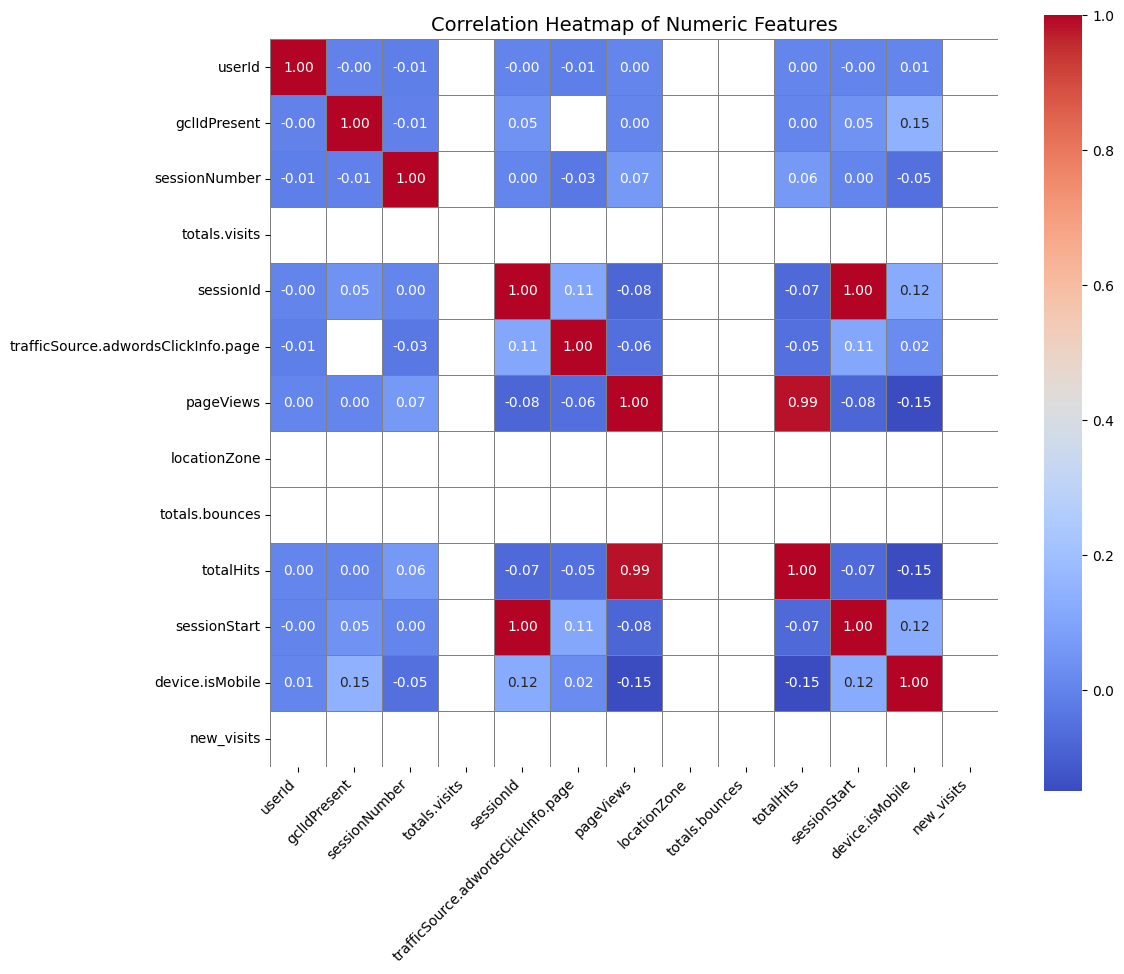

In [72]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Select only numeric columns
numeric_df = X.select_dtypes(include=['int64', 'float64', 'bool'])

# Step 2: Compute correlation matrix
cor_matrix = numeric_df.corr()

# Step 3: Plot full heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(cor_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True,
            linewidths=0.5, linecolor='gray', square=True)

plt.title('Correlation Heatmap of Numeric Features', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [73]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 115787 entries, 0 to 116022
Data columns (total 52 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   trafficSource.isTrueDirect                    42737 non-null   object 
 1   browser                                       115787 non-null  object 
 2   device.screenResolution                       115787 non-null  object 
 3   trafficSource.adContent                       2961 non-null    object 
 4   trafficSource.keyword                         44058 non-null   object 
 5   screenSize                                    115787 non-null  object 
 6   geoCluster                                    115787 non-null  object 
 7   trafficSource.adwordsClickInfo.slot           4269 non-null    object 
 8   device.mobileDeviceBranding                   115787 non-null  object 
 9   device.mobileInputSelector                    115787 

In [74]:
y.equals(df['purchaseValue'])

False

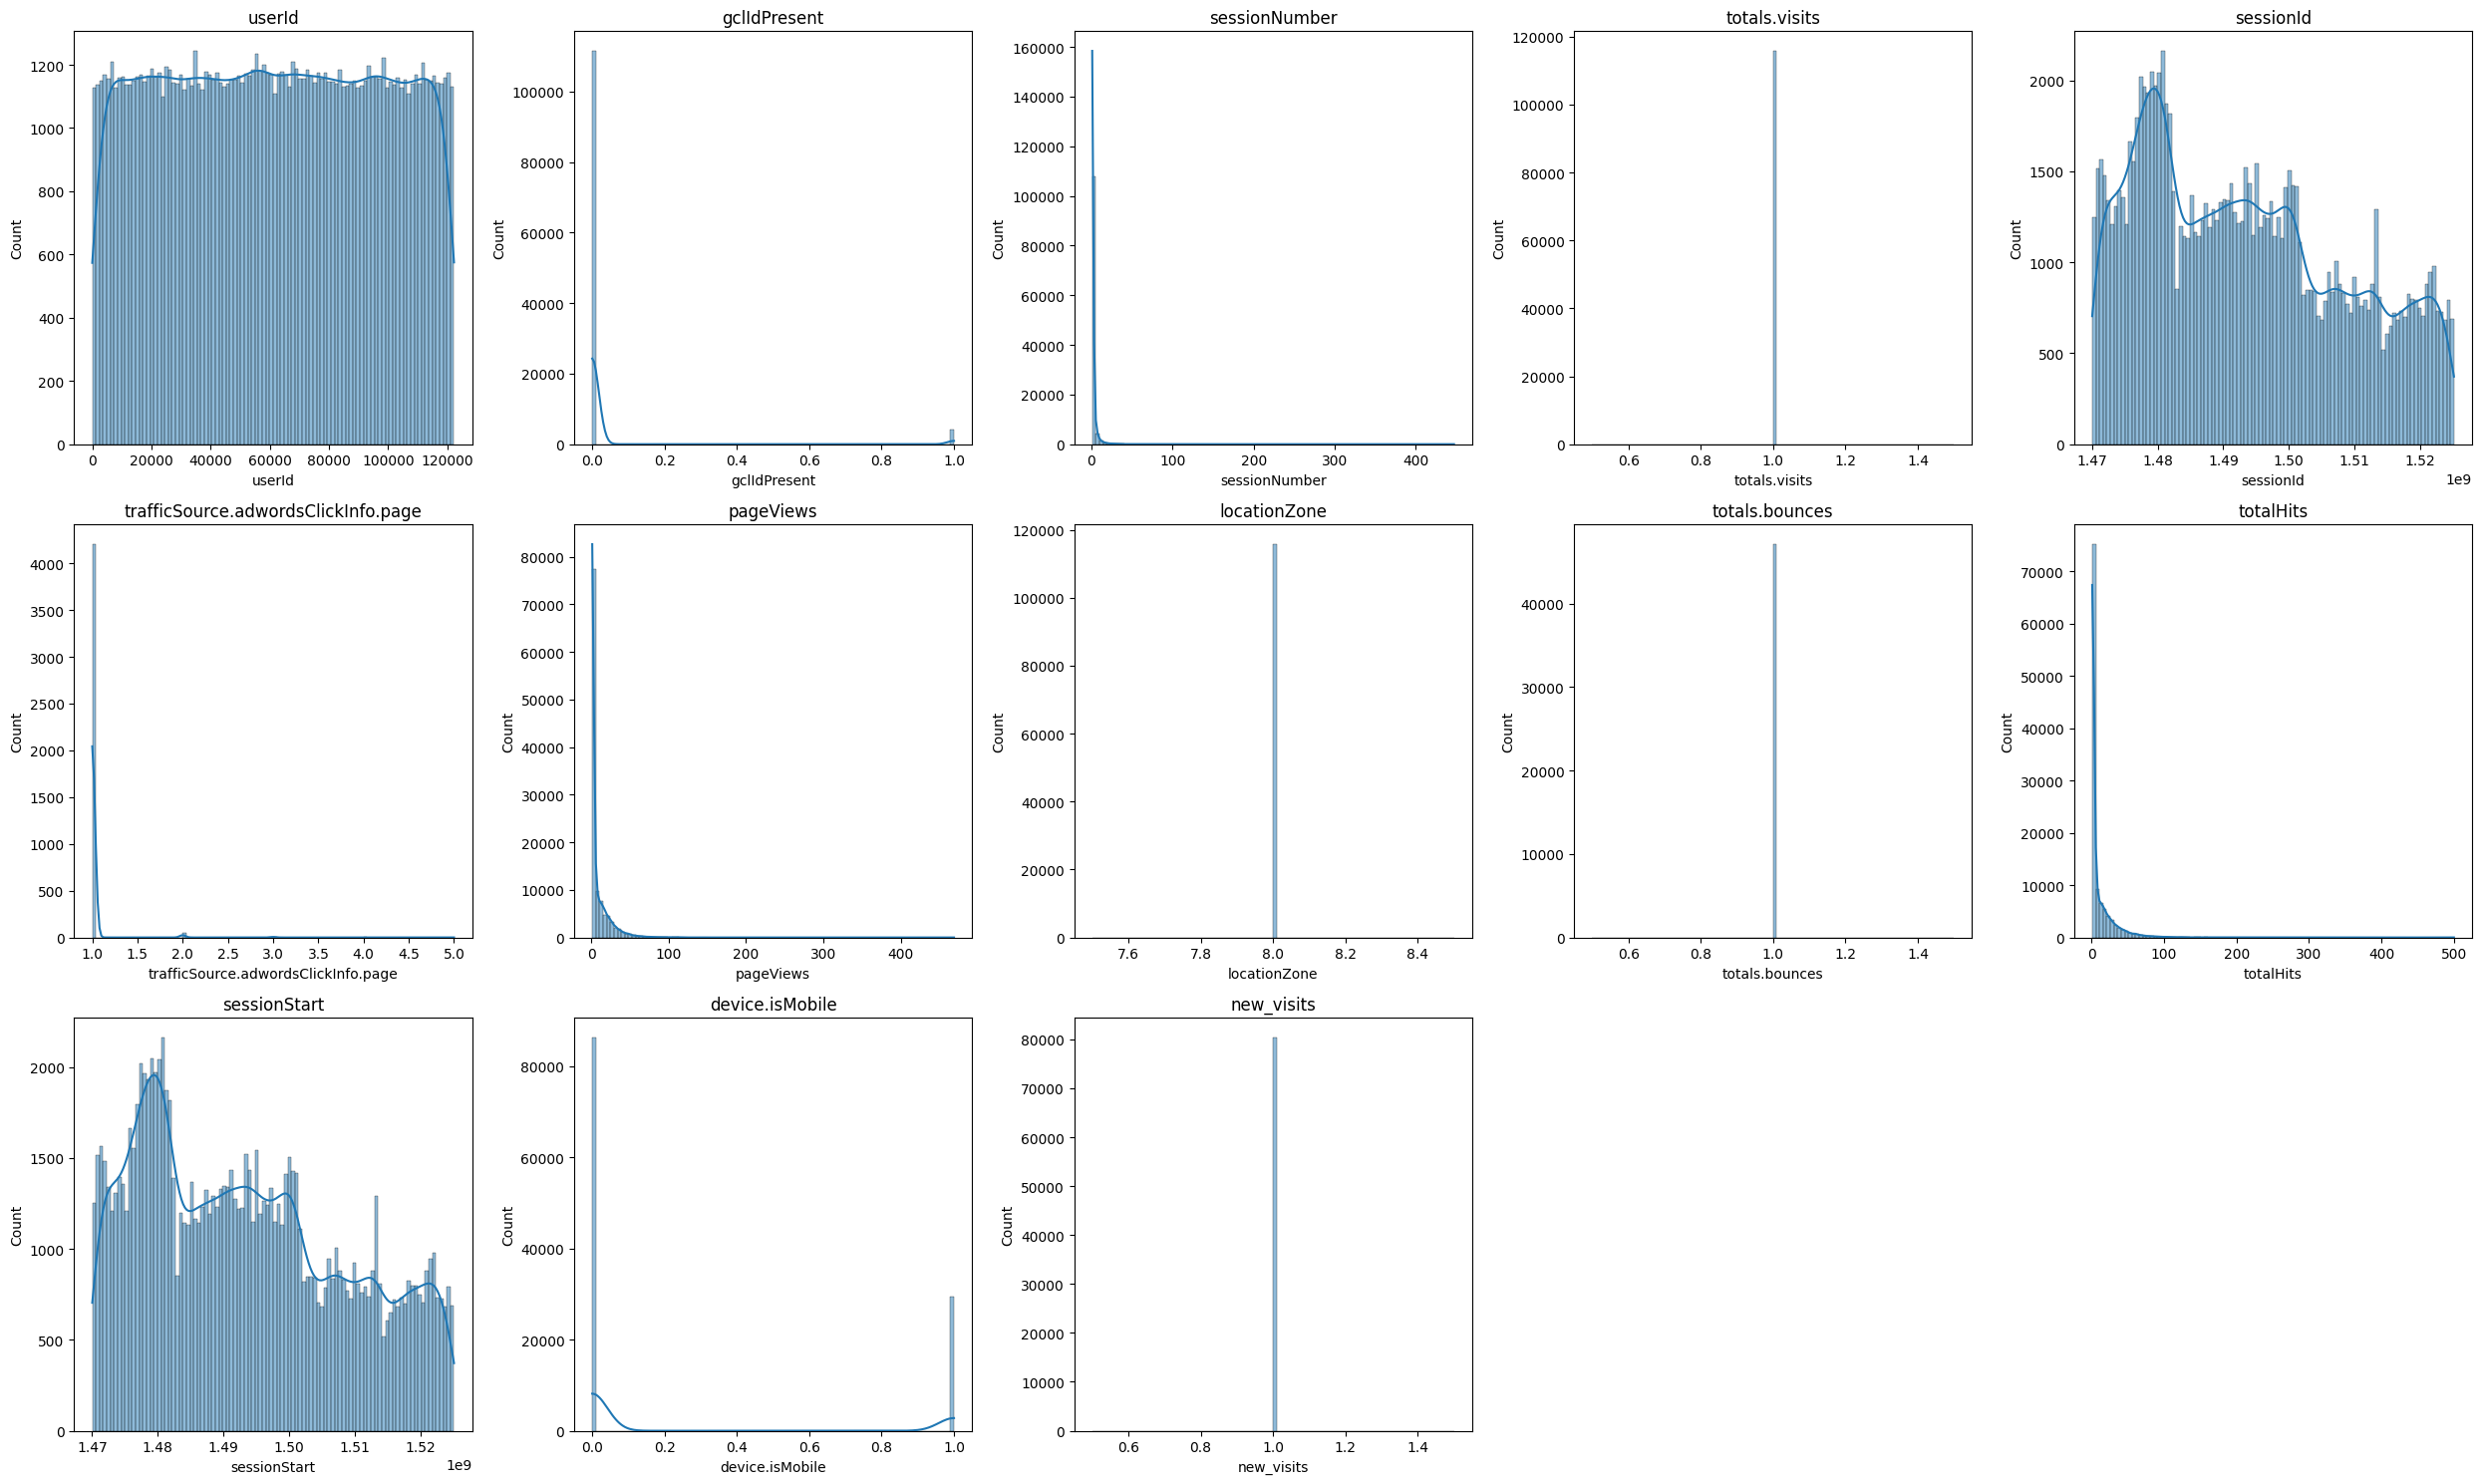

In [75]:
import math
import matplotlib.pyplot as plt
import seaborn as sns

num_columns = X.select_dtypes(include=['int64', 'float64','bool'])

# Example numerical columns from your dataset
numerical_columns = [col for col in num_columns if num_columns[col].dtype in ['int64', 'float64','bool']]

# Set a fixed number of columns per row
columns_per_row = 5
n_features = len(numerical_columns)  # Count of numerical features
n_rows = math.ceil(n_features / columns_per_row)

# Create subplots
fig, axes = plt.subplots(n_rows, columns_per_row, figsize=(5 * columns_per_row, 5 * n_rows))

# Flatten axes only if more than one subplot; otherwise, make it a list
if n_features == 1:
    axes = [axes]  # Wrap single axis in a list for consistent iteration
else:
    axes = axes.flatten()

# Plot each feature
for i, col in enumerate(numerical_columns):
    sns.histplot(X[col], bins=100, kde=True, ax=axes[i])
    axes[i].set_title(f'{col}')

# Turn off unused axes if any
for i in range(len(numerical_columns), len(axes)):
    axes[i].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()


In [76]:
X[categorical_features].isnull().sum()[X[categorical_features].isnull().sum()>0]

trafficSource.isTrueDirect                       73050
trafficSource.adContent                         112826
trafficSource.keyword                            71729
trafficSource.adwordsClickInfo.slot             111518
trafficSource.adwordsClickInfo.isVideoAd        111518
trafficSource.adwordsClickInfo.adNetworkType    111518
trafficSource.referralPath                       73099
dtype: int64

In [77]:
categorical_features_nan = X[categorical_features].isnull().sum()[X[categorical_features].isnull().sum()>0].index.tolist()
categorical_features_nan

['trafficSource.isTrueDirect',
 'trafficSource.adContent',
 'trafficSource.keyword',
 'trafficSource.adwordsClickInfo.slot',
 'trafficSource.adwordsClickInfo.isVideoAd',
 'trafficSource.adwordsClickInfo.adNetworkType',
 'trafficSource.referralPath']

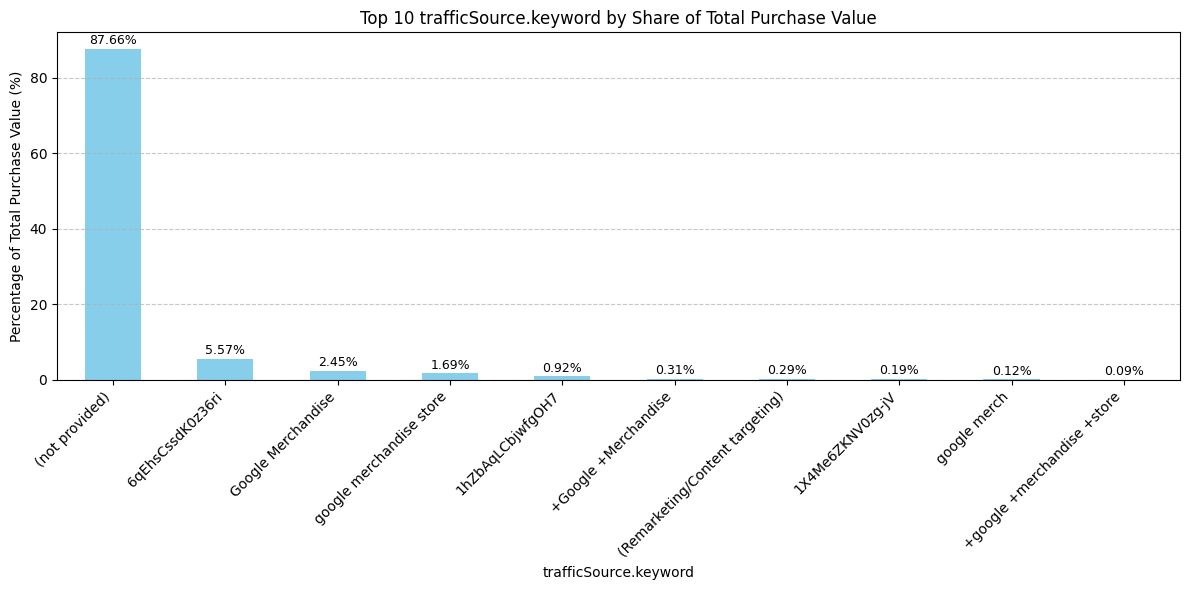

In [78]:
import pandas as pd
import matplotlib.pyplot as plt

# Set feature and target
adcontent_col = 'trafficSource.keyword'
target_col = 'purchaseValue'
top_n = 10

# Group by adContent and sum purchaseValue
category_sum = cdf.groupby(adcontent_col)[target_col].sum()

# Convert to percentage share
category_share = (category_sum / category_sum.sum()) * 100

# Sort and take top N contributors
category_share = category_share.sort_values(ascending=False).head(top_n)

# Plot
plt.figure(figsize=(12, 6))
bars = category_share.plot(kind='bar', color='skyblue')
plt.ylabel('Percentage of Total Purchase Value (%)')
plt.xlabel('trafficSource.keyword')
plt.title(f'Top {top_n} trafficSource.keyword by Share of Total Purchase Value')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate percentage values on top of each bar
for i, value in enumerate(category_share):
    plt.text(i, value + 0.5, f'{value:.2f}%', ha='center', va='bottom', fontsize=9)

plt.show()


In [79]:
cdf.head(200)

trafficSource.isTrueDirect  purchaseValue            browser  \
0                          NaN   0.000000e+00               Edge   
1                         True   0.000000e+00             Chrome   
2                         True   0.000000e+00             Chrome   
3                          NaN   0.000000e+00  Internet Explorer   
4                         True   8.895000e+07             Chrome   
5                         True   2.800000e+07             Chrome   
6                          NaN   8.051000e+07             Chrome   
7                          NaN   0.000000e+00             Chrome   
8                         True   0.000000e+00             Chrome   
9                          NaN   0.000000e+00             Safari   
10                        True   0.000000e+00             Chrome   
11                         NaN   0.000000e+00             Chrome   
12                         NaN   0.000000e+00             Chrome   
13                         NaN   0.000000e+00    Android Webview   
14                         NaN   0.000000e+00             Safari   
15                         NaN   0.000000e+00             Chrome   
16                        True   0.000000e+00            Firefox   
17                         NaN   0.000000e+00             Chrome   
18                        True   0.000000e+00             Chrome   
19                         NaN   0.000000e+00             Safari   
20                         NaN   6.000000e+06             Safari   
21                        True   3.114000e+07             Chrome   
22                        True   0.000000e+00             Chrome   
23                         NaN   0.000000e+00             Chrome   
24                         NaN   0.000000e+00             Chrome   
25                         NaN   0.000000e+00             Safari   
26                        True   2.718000e+07             Chrome   
27                         NaN   0.000000e+00             Chrome   
28                        True   0.000000e+00             Chrome   
29                        True   0.000000e+00             Safari   
30                        True   0.000000e+00             Chrome   
31                        True   7.999000e+07             Chrome   
32                         NaN   0.000000e+00             Chrome   
33                         NaN   0.000000e+00             Safari   
34                         NaN   0.000000e+00             Chrome   
35                        True   6.939000e+07            Firefox   
36                        True   0.000000e+00             Chrome   
37                         NaN   0.000000e+00             Chrome   
38                        True   3.998000e+07             Chrome   
39                        True   1.589400e+09             Chrome   
40                         NaN   0.000000e+00             Chrome   
41                         NaN   0.000000e+00             Chrome   
42                         NaN   2.718000e+07             Chrome   
43                        True   1.329000e+07             Chrome   
44                         NaN   0.000000e+00             Safari   
45                         NaN   0.000000e+00             Chrome   
46                        True   2.399000e+07             Chrome   
47                        True   0.000000e+00             Safari   
48                        True   0.000000e+00             Chrome   
49                        True   0.000000e+00             Chrome   
50                         NaN   0.000000e+00             Chrome   
51                         NaN   0.000000e+00            Firefox   
52                         NaN   0.000000e+00             Chrome   
53                         NaN   0.000000e+00             Chrome   
54                        True   0.000000e+00             Chrome   
55                        True   8.398000e+07             Chrome   
56                         NaN   0.000000e+00             Chrome   
57                         NaN   0.000000e+00             Ch

In [80]:
cdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 115787 entries, 0 to 116022
Data columns (total 52 columns):
 #   Column                                        Non-Null Count   Dtype         
---  ------                                        --------------   -----         
 0   trafficSource.isTrueDirect                    42737 non-null   object        
 1   purchaseValue                                 115787 non-null  float64       
 2   browser                                       115787 non-null  object        
 3   device.screenResolution                       115787 non-null  object        
 4   trafficSource.adContent                       2961 non-null    object        
 5   trafficSource.keyword                         44058 non-null   object        
 6   screenSize                                    115787 non-null  object        
 7   geoCluster                                    115787 non-null  object        
 8   trafficSource.adwordsClickInfo.slot           4269 non-null

In [81]:
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_regression
import pandas as pd

# Separate features and target
X = cdf.drop(columns=['purchaseValue'], errors='ignore')
y = cdf['purchaseValue']

# === Step 1: Preprocessing Pipeline ===
def preprocessing_stage_one(X):
    pipeline = Pipeline([
        ('drop_irrelevant', IrrelevantColumnDropper()),
        ('fill_cat_nans', ImputerTransformer()),
        ('scale_numeric', MinMaxScalerTransformer()),
        ('group_rare_categories', RareCategoryGrouper()),
        ('low_card_ohe', LowCardinalityOHE()),
        ('high_card_freq_enc', HighCardinalityFreqEncoder())
    ])
    X_stage1 = pipeline.fit_transform(X, y)
    return pd.DataFrame(X_stage1, index=X.index)

X_stage1 = preprocessing_stage_one(X)

def preprocessing_stage_two(X_stage1, y):
    pipeline = Pipeline([
        ('low_corr_filter', LowCorrelationFilter(threshold=0.02))
    ])
    X_stage2 = pipeline.fit_transform(X_stage1, y)
    return pd.DataFrame(X_stage2, index=X.index)

X_stage2 = preprocessing_stage_two(X_stage1, y)
stage2_selected = X_stage2.columns
print(X_stage2.shape)

# def preprocessing_stage_three(X_stage2):
#     pipeline = Pipeline([

#     ])
#     X_stage3 = pipeline.fit_transform(X_stage2, y)
#     return pd.DataFrame(X_stage3, index=X.index)
# X_stage3 = preprocessing_stage_three(X_stage2)

# def preprocessing_pipeline(cdf):
#     """Applies Imputation, Encoding, and Scaling."""

#     pipeline = Pipeline([
#         ('drop_irrelevant', IrrelevantColumnDropper()),
#         ('group_rare_categories', RareCategoryGrouper()),
#         ('low_corr_filter', LowCorrelationFilter(threshold=0.02)),
#         ('scale_numeric', MinMaxScalerTransformer()),
#         ('fill_cat_nans', CategoricalNaNFiller()),
#         ('low_card_ohe', LowCardinalityOHE()),
#         ('high_card_freq_enc', HighCardinalityFreqEncoder())
#     ])

#     X_prep = pipeline.fit_transform(X,y)  # Only features
#     return pd.DataFrame(X_prep,index=X.index)


✅ Rare category replacement complete.
🔠 Low-cardinality columns to one-hot encode: ['browser', 'geoCluster', 'geoNetwork.networkDomain', 'geoNetwork.region', 'trafficSource', 'os', 'trafficSource.medium', 'geoNetwork.metro', 'deviceType', 'userChannel', 'geoNetwork.continent', 'device.isMobile']
📊 High-cardinality columns to frequency encode: ['geoNetwork.subContinent', 'locationCountry', 'geoNetwork.city']
🧹 Dropping low correlation columns: ['userId', 'sessionId', 'sessionStart', 'browser_Edge', 'browser_Internet Explorer', 'geoCluster_Region_2', 'geoCluster_Region_3', 'geoCluster_Region_4', 'geoCluster_Region_5', 'geoNetwork.networkDomain_domain2', 'geoNetwork.networkDomain_domain3', 'geoNetwork.region_England', 'geoNetwork.region_Texas', 'geoNetwork.region_Washington', 'trafficSource_Partners', 'trafficSource_Rare', 'trafficSource_analytics.google.com', 'os_Linux', 'os_Rare', 'trafficSource.medium_affiliate', 'trafficSource.medium_cpc', 'geoNetwork.metro_London', 'geoNetwork.metro_

In [82]:
X_stage1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 115787 entries, 0 to 116022
Data columns (total 71 columns):
 #   Column                                              Non-Null Count   Dtype         
---  ------                                              --------------   -----         
 0   userId                                              115787 non-null  float64       
 1   sessionNumber                                       115787 non-null  float64       
 2   sessionId                                           115787 non-null  float64       
 3   geoNetwork.subContinent                             115787 non-null  float64       
 4   locationCountry                                     115787 non-null  float64       
 5   geoNetwork.city                                     115787 non-null  float64       
 6   pageViews                                           115787 non-null  float64       
 7   date                                                115787 non-null  datetime64[ns]
 8  

In [83]:
#Total number of remainig nummerical columns
numerical_features = X_stage1.select_dtypes(include=['int64', 'float64','bool','datetime64[ns]']).columns
print(numerical_features)
print(len(numerical_features))

Index(['userId', 'sessionNumber', 'sessionId', 'geoNetwork.subContinent',
       'locationCountry', 'geoNetwork.city', 'pageViews', 'date', 'totalHits',
       'sessionStart', 'new_visits', 'browser_Chrome', 'browser_Edge',
       'browser_Firefox', 'browser_Internet Explorer', 'browser_Rare',
       'browser_Safari', 'geoCluster_Region_2', 'geoCluster_Region_3',
       'geoCluster_Region_4', 'geoCluster_Region_5',
       'geoNetwork.networkDomain_domain2', 'geoNetwork.networkDomain_domain3',
       'geoNetwork.region_California', 'geoNetwork.region_England',
       'geoNetwork.region_Illinois', 'geoNetwork.region_New York',
       'geoNetwork.region_Rare', 'geoNetwork.region_Texas',
       'geoNetwork.region_Washington',
       'geoNetwork.region_not available in demo dataset',
       'trafficSource_Partners', 'trafficSource_Rare',
       'trafficSource_analytics.google.com', 'trafficSource_google',
       'trafficSource_mall.googleplex.com', 'trafficSource_youtube.com',
       'os_Ch

In [84]:
X_stage2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 115787 entries, 0 to 116022
Data columns (total 42 columns):
 #   Column                                              Non-Null Count   Dtype         
---  ------                                              --------------   -----         
 0   sessionNumber                                       115787 non-null  float64       
 1   geoNetwork.subContinent                             115787 non-null  float64       
 2   locationCountry                                     115787 non-null  float64       
 3   geoNetwork.city                                     115787 non-null  float64       
 4   pageViews                                           115787 non-null  float64       
 5   date                                                115787 non-null  datetime64[ns]
 6   totalHits                                           115787 non-null  float64       
 7   new_visits                                          115787 non-null  float64       
 8  

In [85]:
#Total number of remainig nummerical columns
numerical_features = X_stage2.select_dtypes(include=['int64', 'float64','bool','datetime64[ns]']).columns
print(numerical_features)
print(len(numerical_features))

Index(['sessionNumber', 'geoNetwork.subContinent', 'locationCountry',
       'geoNetwork.city', 'pageViews', 'date', 'totalHits', 'new_visits',
       'browser_Chrome', 'browser_Firefox', 'browser_Rare', 'browser_Safari',
       'geoNetwork.region_California', 'geoNetwork.region_Illinois',
       'geoNetwork.region_New York', 'geoNetwork.region_Rare',
       'geoNetwork.region_not available in demo dataset',
       'trafficSource_google', 'trafficSource_mall.googleplex.com',
       'trafficSource_youtube.com', 'os_Chrome OS', 'os_Macintosh',
       'os_Windows', 'os_iOS', 'trafficSource.medium_Rare',
       'trafficSource.medium_organic', 'trafficSource.medium_referral',
       'geoNetwork.metro_Chicago IL', 'geoNetwork.metro_New York NY',
       'geoNetwork.metro_Rare',
       'geoNetwork.metro_San Francisco-Oakland-San Jose CA',
       'geoNetwork.metro_not available in demo dataset', 'deviceType_mobile',
       'userChannel_Direct', 'userChannel_Display',
       'userChannel_Organic

In [86]:
X_stage2.head(200)

sessionNumber  geoNetwork.subContinent  locationCountry  geoNetwork.city  \
0             0.00                     0.55             0.52             0.24   
1             0.00                     0.55             0.52             0.06   
2             0.00                     0.03             0.01             0.24   
3             0.00                     0.04             0.02             0.52   
4             0.00                     0.55             0.52             0.52   
5             0.00                     0.55             0.52             0.52   
6             0.00                     0.55             0.52             0.52   
7             0.00                     0.06             0.19             0.24   
8             0.01                     0.04             0.02             0.24   
9             0.00                     0.04             0.19             0.24   
10            0.00                     0.55             0.03             0.52   
11            0.00                     0.55             0.52             0.52   
12            0.00                     0.04             0.02             0.24   
13            0.00                     0.06             0.05             0.24   
14            0.00                     0.06             0.02             0.24   
15            0.00                     0.55             0.52             0.52   
16            0.00                     0.04             0.19             0.24   
17            0.00                     0.05             0.01             0.52   
18            0.00                     0.05             0.19             0.24   
19            0.00                     0.06             0.02             0.52   
20            0.01                     0.55             0.52             0.52   
21            0.00                     0.55             0.52             0.52   
22            0.48                     0.55             0.52             0.52   
23            0.00                     0.55             0.52             0.52   
24            0.00                     0.03             0.01             0.52   
25            0.00                     0.03             0.02             0.24   
26            0.00                     0.55             0.52             0.03   
27            0.00                     0.55             0.52             0.03   
28            0.00                     0.55             0.52             0.52   
29            0.00                     0.55             0.03             0.24   
30            0.00                     0.55             0.52             0.24   
31            0.00                     0.55             0.52             0.01   
32            0.00                     0.55             0.52             0.52   
33            0.00                     0.06             0.19             0.52   
34            0.00                     0.04             0.19             0.52   
35            0.00                     0.55             0.52             0.05   
36            0.00                     0.04             0.19             0.24   
37            0.00                     0.04             0.19             0.52   
38            0.00                     0.55             0.52             0.05   
39            0.00                     0.02             0.19             0.52   
40            0.00                     0.04             0.02             0.52   
41            0.00                     0.03             0.02             0.24   
42            0.00                     0.55             0.52             0.24   
43            0.01                     0.55             0.52             0.52   
44            0.00                     0.06             0.19             0.24   
45            0.00                     0.06             0.05             0.24   
46            0.01                     0.55             0.52             0.52   
47            0.00                     0.02             0.19             0.52   
48            0.00                  

In [87]:
# === Step 2: Feature Selection Pipeline ===

def feature_selection_pipeline(X, y):
    """Applies SelectKBest feature selection after dropping datetime columns."""
    # Drop datetime columns from input X
    X_filtered = X.select_dtypes(exclude=['datetime64[ns]', 'datetime64[ns, UTC]'])

    selector = SelectKBest(score_func=f_regression, k=40)
    X_selected_array = selector.fit_transform(X_filtered, y)

    # Mask and feature names from filtered dataframe
    selected_mask = selector.get_support()
    selected_features = X_filtered.columns[selected_mask]

    # Return as DataFrame with original index
    X_selected = pd.DataFrame(X_selected_array, columns=selected_features, index=X.index)
    return X_selected

# === Apply Pipelines ===
# X_prep = preprocessing_pipeline(X)         # Apply preprocessing steps (without touching y)
X = feature_selection_pipeline(X_stage2, y)  # Feature selection using y
final_selected = X.columns
# === Final Outputs ===
print("✅ Shape of X after feature selection:", X.shape)

✅ Shape of X after feature selection: (115787, 40)


In [88]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 115787 entries, 0 to 116022
Data columns (total 40 columns):
 #   Column                                              Non-Null Count   Dtype  
---  ------                                              --------------   -----  
 0   sessionNumber                                       115787 non-null  float64
 1   geoNetwork.subContinent                             115787 non-null  float64
 2   locationCountry                                     115787 non-null  float64
 3   geoNetwork.city                                     115787 non-null  float64
 4   pageViews                                           115787 non-null  float64
 5   totalHits                                           115787 non-null  float64
 6   browser_Chrome                                      115787 non-null  float64
 7   browser_Firefox                                     115787 non-null  float64
 8   browser_Rare                                        115787 non-null  

In [89]:
#Total number of remainig nummerical columns
numerical_features = X.select_dtypes(include=['int64', 'float64','bool']).columns
print(numerical_features)
print(len(numerical_features))

Index(['sessionNumber', 'geoNetwork.subContinent', 'locationCountry',
       'geoNetwork.city', 'pageViews', 'totalHits', 'browser_Chrome',
       'browser_Firefox', 'browser_Rare', 'browser_Safari',
       'geoNetwork.region_California', 'geoNetwork.region_Illinois',
       'geoNetwork.region_New York', 'geoNetwork.region_Rare',
       'geoNetwork.region_not available in demo dataset',
       'trafficSource_google', 'trafficSource_mall.googleplex.com',
       'trafficSource_youtube.com', 'os_Chrome OS', 'os_Macintosh',
       'os_Windows', 'os_iOS', 'trafficSource.medium_Rare',
       'trafficSource.medium_organic', 'trafficSource.medium_referral',
       'geoNetwork.metro_Chicago IL', 'geoNetwork.metro_New York NY',
       'geoNetwork.metro_Rare',
       'geoNetwork.metro_San Francisco-Oakland-San Jose CA',
       'geoNetwork.metro_not available in demo dataset', 'deviceType_mobile',
       'userChannel_Direct', 'userChannel_Display',
       'userChannel_Organic Search', 'userChannel

In [90]:
X.head(200)

sessionNumber  geoNetwork.subContinent  locationCountry  geoNetwork.city  \
0             0.00                     0.55             0.52             0.24   
1             0.00                     0.55             0.52             0.06   
2             0.00                     0.03             0.01             0.24   
3             0.00                     0.04             0.02             0.52   
4             0.00                     0.55             0.52             0.52   
5             0.00                     0.55             0.52             0.52   
6             0.00                     0.55             0.52             0.52   
7             0.00                     0.06             0.19             0.24   
8             0.01                     0.04             0.02             0.24   
9             0.00                     0.04             0.19             0.24   
10            0.00                     0.55             0.03             0.52   
11            0.00                     0.55             0.52             0.52   
12            0.00                     0.04             0.02             0.24   
13            0.00                     0.06             0.05             0.24   
14            0.00                     0.06             0.02             0.24   
15            0.00                     0.55             0.52             0.52   
16            0.00                     0.04             0.19             0.24   
17            0.00                     0.05             0.01             0.52   
18            0.00                     0.05             0.19             0.24   
19            0.00                     0.06             0.02             0.52   
20            0.01                     0.55             0.52             0.52   
21            0.00                     0.55             0.52             0.52   
22            0.48                     0.55             0.52             0.52   
23            0.00                     0.55             0.52             0.52   
24            0.00                     0.03             0.01             0.52   
25            0.00                     0.03             0.02             0.24   
26            0.00                     0.55             0.52             0.03   
27            0.00                     0.55             0.52             0.03   
28            0.00                     0.55             0.52             0.52   
29            0.00                     0.55             0.03             0.24   
30            0.00                     0.55             0.52             0.24   
31            0.00                     0.55             0.52             0.01   
32            0.00                     0.55             0.52             0.52   
33            0.00                     0.06             0.19             0.52   
34            0.00                     0.04             0.19             0.52   
35            0.00                     0.55             0.52             0.05   
36            0.00                     0.04             0.19             0.24   
37            0.00                     0.04             0.19             0.52   
38            0.00                     0.55             0.52             0.05   
39            0.00                     0.02             0.19             0.52   
40            0.00                     0.04             0.02             0.52   
41            0.00                     0.03             0.02             0.24   
42            0.00                     0.55             0.52             0.24   
43            0.01                     0.55             0.52             0.52   
44            0.00                     0.06             0.19             0.24   
45            0.00                     0.06             0.05             0.24   
46            0.01                     0.55             0.52             0.52   
47            0.00                     0.02             0.19             0.52   
48            0.00                  

## Fitting our Machine Learning Regression Model!

In [91]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [92]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# Initialize the Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = model.predict(X_test)

# Model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Get the coefficients (weights)
coefficients = model.coef_
intercept = model.intercept_

print("Coefficients:", coefficients)
print("Intercept:", intercept)

Mean Squared Error: 3.887814264198599e+16
R^2 Score: 0.12400563514527552
Coefficients: [ 1.69888526e+09  5.00941692e+06  1.22543420e+07 -6.96729274e+06
  1.31169585e+08  1.03681558e+09  7.29827376e+06  2.59124225e+07
  6.79761274e+06  2.62329831e+06  1.16239730e+07 -9.56358497e+06
  3.67532884e+07  4.45249150e+06 -9.56225583e+19 -1.33124286e+07
  1.17984912e+07  1.29237488e+07  3.91066076e+07  2.40491706e+07
  1.83961426e+07  3.26001772e+06  1.31885014e+08  1.34419730e+07
 -8.70302910e+06  4.40982547e+07 -2.00247361e+07 -1.61818830e+06
 -1.98727037e+07  9.56225583e+19  2.06216472e+06  1.37513040e+07
  1.72069944e+07 -6.03216647e+06  5.97217604e+06 -1.40272504e+06
 -9.64639414e+06 -6.74096187e+06 -6.40833959e+06  1.14969592e+07]
Intercept: -29282872.172732882


In [93]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=42)

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared (R2) Score:", r2)

coefficients = model.coef_
intercept = model.intercept_

print("Coefficients:", coefficients)
print("Intercept:", intercept)

Mean Squared Error: 4.065268831938676e+16
R-squared (R2) Score: 0.0840219345890244
Coefficients: [ 1.69888526e+09  5.00941692e+06  1.22543420e+07 -6.96729274e+06
  1.31169585e+08  1.03681558e+09  7.29827376e+06  2.59124225e+07
  6.79761274e+06  2.62329831e+06  1.16239730e+07 -9.56358497e+06
  3.67532884e+07  4.45249150e+06 -9.56225583e+19 -1.33124286e+07
  1.17984912e+07  1.29237488e+07  3.91066076e+07  2.40491706e+07
  1.83961426e+07  3.26001772e+06  1.31885014e+08  1.34419730e+07
 -8.70302910e+06  4.40982547e+07 -2.00247361e+07 -1.61818830e+06
 -1.98727037e+07  9.56225583e+19  2.06216472e+06  1.37513040e+07
  1.72069944e+07 -6.03216647e+06  5.97217604e+06 -1.40272504e+06
 -9.64639414e+06 -6.74096187e+06 -6.40833959e+06  1.14969592e+07]
Intercept: -29282872.172732882


In [94]:
import lightgbm as lgb

# Create LightGBM datasets
train_data_lgb = lgb.Dataset(X_train, label=y_train)
test_data_lgb = lgb.Dataset(X_test, label=y_test)

# Set default parameters
params = {
    'objective': 'regression',
    'metric': 'rmse'  # RMSE is default for regression
}

# Train the model
model_lgb = lgb.train(params, train_data_lgb, valid_sets=[test_data_lgb])

# Make predictions on the test set
y_pred = model_lgb.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"R2 Score: {r2:.4f}")
print(f"Mean Squared Error: {mse:.4f}")

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009749 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 241
[LightGBM] [Info] Number of data points in the train set: 81050, number of used features: 40
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 26267079.790944
R2 Score: 0.0702
Mean Squared Error: 41265682893894864.0000


## Hyperparameter Tunned Models ML Models

In [95]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'learning_rate': [0.05,0.1, 0.15],
    'max_depth': [1,2,3],
    'min_child_weight': [1, 2, 3]
}

# Create the XGBoost regressor
xgb = XGBRegressor(
    objective='reg:squarederror',  # Explicitly define objective to avoid warnings
    n_estimators=100,              # Set a reasonable number of trees
    random_state=42                # For reproducibility
)

# Create GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='r2',     # Use R² as the evaluation metric
    cv=3,             # 5-fold cross-validation
    verbose=2,        # Show training output
    n_jobs=-1         # Use all available cores
)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
xgb_best_model = grid_search.best_estimator_


print("Best Parameters:", best_params)
print("Best R² Score from CV:", best_score)


Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best Parameters: {'learning_rate': 0.15, 'max_depth': 3, 'min_child_weight': 2}
Best R² Score from CV: 0.42064729565248954


In [96]:
print(best_params)

{'learning_rate': 0.15, 'max_depth': 3, 'min_child_weight': 2}


In [97]:
from lightgbm import LGBMRegressor

param_grid_lgb = {
    'learning_rate': [0.13, 0.15, 0.18],
    'max_depth': [1,2,3],
    'num_leaves': [22, 25,27],
    'n_estimators': [225, 250, 275]
}

lgb = LGBMRegressor(random_state=42, verbose=-1)

grid_lgb = GridSearchCV(
    estimator=lgb,
    param_grid=param_grid_lgb,
    scoring='r2',
    cv=3,
    verbose=-1,
    n_jobs=-1
)

grid_lgb.fit(X_train, y_train)
print("LightGBM Best Params:", grid_lgb.best_params_)
print("Best R² Score:", grid_lgb.best_score_)


[CV] END learning_rate=0.05, max_depth=1, min_child_weight=2; total time=   0.9s
[CV] END learning_rate=0.05, max_depth=1, min_child_weight=3; total time=   0.9s
[CV] END learning_rate=0.05, max_depth=2, min_child_weight=1; total time=   0.9s
[CV] END learning_rate=0.05, max_depth=2, min_child_weight=2; total time=   0.9s
[CV] END learning_rate=0.05, max_depth=3, min_child_weight=1; total time=   1.0s
[CV] END learning_rate=0.05, max_depth=3, min_child_weight=2; total time=   1.0s
[CV] END learning_rate=0.05, max_depth=3, min_child_weight=3; total time=   0.9s
[CV] END .learning_rate=0.1, max_depth=1, min_child_weight=2; total time=   0.8s
[CV] END .learning_rate=0.1, max_depth=1, min_child_weight=3; total time=   0.8s
[CV] END .learning_rate=0.1, max_depth=2, min_child_weight=1; total time=   1.0s
[CV] END .learning_rate=0.1, max_depth=2, min_child_weight=3; total time=   0.9s
[CV] END .learning_rate=0.1, max_depth=3, min_child_weight=1; total time=   1.1s
[CV] END .learning_rate=0.1,

In [98]:
from sklearn.ensemble import GradientBoostingRegressor

param_grid_gb = {
    'learning_rate': [0.1,0.13],
    'n_estimators': [30, 50,75],
    'max_depth': [5,7]
    # 'min_samples_split': [2, 5]
}

gb = GradientBoostingRegressor(random_state=42)

grid_gb = GridSearchCV(
    estimator=gb,
    param_grid=param_grid_gb,
    scoring='r2',
    cv=3,
    verbose=-1,
    n_jobs=-1
)

grid_gb.fit(X_train, y_train)
print("Gradient Boosting Best Params:", grid_gb.best_params_)
print("Best R² Score:", grid_gb.best_score_)


Gradient Boosting Best Params: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 30}
Best R² Score: 0.33489242679439607


In [99]:
from sklearn.linear_model import Ridge

param_grid_ridge = {
    'alpha': [0.05, 1.0, 5.0]
}

ridge = Ridge()

grid_ridge = GridSearchCV(
    estimator=ridge,
    param_grid=param_grid_ridge,
    scoring='r2',
    cv=3,
    verbose=2,
    n_jobs=-1
)

grid_ridge.fit(X_train, y_train)
print("Ridge Best Params:", grid_ridge.best_params_)
print("Best R² Score:", grid_ridge.best_score_)


Fitting 3 folds for each of 3 candidates, totalling 9 fits
Ridge Best Params: {'alpha': 5.0}
Best R² Score: 0.10718974098274787


In [100]:
from sklearn.ensemble import RandomForestRegressor

param_grid_rf = {
    'n_estimators': [75,100,125],
    'max_depth': [3, 5, 7],
    'min_samples_split': [1,2,3]
    # 'min_samples_leaf': [1, 2]
}

rf = RandomForestRegressor(random_state=42)

grid_rf = GridSearchCV(
    estimator=rf,
    param_grid=param_grid_rf,
    scoring='r2',
    cv=3,
    verbose=-1,
    n_jobs=-1
)

grid_rf.fit(X_train, y_train)
print("Random Forest Best Params:", grid_rf.best_params_)
print("Best R² Score:", grid_rf.best_score_)


Random Forest Best Params: {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 125}
Best R² Score: 0.3721933874969665


In [101]:
test_df = pd.read_csv('/kaggle/input/engage-2-value-from-clicks-to-conversions/test_data.csv')
test_df.shape

(29006, 51)

In [102]:
test_df.head(100)

userChannel      date           browser             device.browserSize  \
0           Social  20170508            Chrome  not available in demo dataset   
1   Organic Search  20170405            Chrome  not available in demo dataset   
2   Organic Search  20170308            Safari  not available in demo dataset   
3         Referral  20171113            Chrome  not available in demo dataset   
4   Organic Search  20161212            Chrome  not available in demo dataset   
5         Referral  20161208            Chrome  not available in demo dataset   
6   Organic Search  20160825            Chrome  not available in demo dataset   
7   Organic Search  20171207            Safari  not available in demo dataset   
8   Organic Search  20161123            Chrome  not available in demo dataset   
9      Paid Search  20170115            Chrome  not available in demo dataset   
10  Organic Search  20170821            Chrome  not available in demo dataset   
11  Organic Search  20170115            Chrome  not available in demo dataset   
12  Organic Search  20180319            Chrome  not available in demo dataset   
13          Direct  20161101            Chrome  not available in demo dataset   
14  Organic Search  20170428            Chrome  not available in demo dataset   
15          Direct  20170619            Chrome  not available in demo dataset   
16  Organic Search  20170311            Chrome  not available in demo dataset   
17  Organic Search  20180403            Chrome  not available in demo dataset   
18          Direct  20161205            Chrome  not available in demo dataset   
19          Social  20161204            Safari  not available in demo dataset   
20  Organic Search  20160824            Chrome  not available in demo dataset   
21  Organic Search  20170525            Chrome  not available in demo dataset   
22          Direct  20171108  Samsung Internet  not available in demo dataset   
23          Direct  20170418            Chrome  not available in demo dataset   
24          Direct  20170407            Chrome  not available in demo dataset   
25  Organic Search  20161002            Chrome  not available in demo dataset   
26  Organic Search  20170513            Chrome  not available in demo dataset   
27  Organic Search  20170818            Chrome  not available in demo dataset   
28  Organic Search  20161019            Chrome  not available in demo dataset   
29  Organic Search  20161116            Chrome  not available in demo dataset   
30  Organic Search  20171212            Chrome  not available in demo dataset   
31        Referral  20180326            Chrome  not available in demo dataset   
32          Social  20161119            Safari  not available in demo dataset   
33  Organic Search  20170619            Chrome  not available in demo dataset   
34  Organic Search  20180423            Safari  not available in demo dataset   
35  Organic Search  20170224            Chrome  not available in demo dataset   
36          Social  20161004              Edge  not available in demo dataset   
37          Social  20160915            Safari  not available in demo dataset   
38        Referral  20170207            Chrome  not available in demo dataset   
39          Social  20160829            Chrome  not available in demo dataset   
40  Organic Search  20170731            Chrome  not available in demo dataset   
41          Social  20161030            Safari  not available in demo dataset   
42          Social  20161118            Safari  not available in demo dataset   
43  Organic Search  20170131            Chrome  not available in demo dataset   
44  Organic Search  20170107            Chrome  not available in demo dataset   
45  Organic Search  20170330            Chrome  not available in demo dataset   
46     Paid Search  20180113            Chrome  not available in demo dataset   
47          Direct  20170314            Chrome  not available in demo dataset   
48  Organic Search  20170905          

In [103]:
X_stage1 = preprocessing_stage_one(test_df)
testdf_stage2 = X_stage1[stage2_selected]
testdf_final = testdf_stage2[stage2_selected]
testdf_final

✅ Rare category replacement complete.
🔠 Low-cardinality columns to one-hot encode: ['userChannel', 'browser', 'deviceType', 'device.isMobile', 'os', 'geoNetwork.continent', 'geoNetwork.metro', 'geoNetwork.networkDomain', 'geoNetwork.region', 'trafficSource.campaign', 'trafficSource.medium', 'trafficSource', 'geoCluster']
📊 High-cardinality columns to frequency encode: ['geoNetwork.city', 'locationCountry', 'geoNetwork.subContinent']


sessionNumber  geoNetwork.subContinent  locationCountry  \
0               0.00                     0.55             0.52   
1               0.00                     0.55             0.52   
2               0.00                     0.55             0.52   
3               0.09                     0.55             0.52   
4               0.00                     0.55             0.52   
...              ...                      ...              ...   
29001           0.05                     0.04             0.02   
29002           0.00                     0.55             0.52   
29003           0.00                     0.55             0.52   
29004           0.00                     0.04             0.19   
29005           0.00                     0.05             0.19   

       geoNetwork.city  pageViews  date  totalHits  new_visits  \
0                 0.52       0.02  0.49       0.02         0.0   
1                 0.24       0.02  0.49       0.02         0.0   
2                 0.24       0.00  0.48       0.00         0.0   
3                 0.52       0.00  0.53       0.00         0.0   
4                 0.52       0.01  0.02       0.01         0.0   
...                ...        ...   ...        ...         ...   
29001             0.24       0.00  0.01       0.00         0.0   
29002             0.52       0.12  0.48       0.15         0.0   
29003             0.52       0.06  0.02       0.07         0.0   
29004             0.52       0.00  0.02       0.00         0.0   
29005             0.52       0.02  0.52       0.02         0.0   

       browser_Chrome  browser_Firefox  browser_Rare  browser_Safari  \
0                 1.0              0.0           0.0             0.0   
1                 1.0              0.0           0.0             0.0   
2                 0.0              0.0           0.0             1.0   
3                 1.0              0.0           0.0             0.0   
4                 1.0              0.0           0.0             0.0   
...               ...              ...           ...             ...   
29001             1.0              0.0           0.0             0.0   
29002             1.0              0.0           0.0             0.0   
29003             1.0              0.0           0.0             0.0   
29004             1.0              0.0           0.0             0.0   
29005             1.0              0.0           0.0             0.0   

       geoNetwork.region_California  geoNetwork.region_Illinois  \
0                               0.0                         0.0   
1                               1.0                         0.0   
2                               0.0                         0.0   
3                               0.0                         0.0   
4                               0.0                         0.0   
...                             ...                         ...   
29001                           0.0                         0.0   
29002                           0.0                         0.0   
29003                           0.0                         0.0   
29004                           0.0                         0.0   
29005                           0.0                         0.0   

       geoNetwork.region_New York  geoNetwork.region_Rare  \
0                             0.0                     0.0   
1                             0.0                     0.0   
2                             0.0                     1.0   
3                             0.0                     0.0   
4                             0.0                     0.0   
...                           ...                     ...   
29001                         0.0                     1.0   
29002                         0.0                     0.0   
29003                         0.0                     0.0   
29004                         0.0                     0.0   
29005                         0.0                     0.0   

       geoNetwork.

In [104]:
testdf_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29006 entries, 0 to 29005
Data columns (total 42 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   sessionNumber                                       29006 non-null  float64
 1   geoNetwork.subContinent                             29006 non-null  float64
 2   locationCountry                                     29006 non-null  float64
 3   geoNetwork.city                                     29006 non-null  float64
 4   pageViews                                           29006 non-null  float64
 5   date                                                29006 non-null  float64
 6   totalHits                                           29006 non-null  float64
 7   new_visits                                          29006 non-null  float64
 8   browser_Chrome                                      29006 non-null  float64


In [105]:
testdf_final.drop(columns=['new_visits','date'], inplace=True)

In [106]:
xgb.fit(X,y)
y_pred = xgb.predict(testdf_final)
submission = pd.DataFrame({"id": range(0,testdf_final.shape[0]), "target": y_pred})
submission.to_csv('submission.csv',index=False)
print("Submission Successfull")

Submission Successfull
[CV] END ..........................................alpha=1.0; total time=   0.1s
[CV] END ..........................................alpha=5.0; total time=   0.1s
[CV] END .........................................alpha=0.05; total time=   0.1s
[CV] END ..........................................alpha=1.0; total time=   0.1s
[CV] END ..........................................alpha=5.0; total time=   0.0s
[CV] END .........................................alpha=0.05; total time=   0.1s
[CV] END ..........................................alpha=1.0; total time=   0.1s
[CV] END .........................................alpha=0.05; total time=   0.1s
[CV] END ..........................................alpha=5.0; total time=   0.1s
